In [65]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
df = pd.read_csv("enhanced_student_habits_performance_dataset.csv" )

print(" Kích thước dữ liệu:", df.shape)
print(df.info()) 
df.head()

 Kích thước dữ liệu: (80000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_educ

student_id  age  gender             major  study_hours_per_day  \
0      100000   26    Male  Computer Science             7.645367   
1      100001   28    Male              Arts             5.700000   
2      100002   17    Male              Arts             2.400000   
3      100003   27   Other        Psychology             3.400000   
4      100004   25  Female          Business             4.700000   

   social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0                 3.0            0.1           Yes                   70.3   
1                 0.5            0.4            No                   88.4   
2                 4.2            0.7            No                   82.1   
3                 4.6            2.3           Yes                   79.3   
4                 0.8            2.7           Yes                   62.9   

   sleep_hours  ... screen_time  study_environment access_to_tutoring  \
0          6.2  ...        10.9  Co-Learning Group                Yes   
1          7.2  ...         8.3  Co-Learning Group                Yes   
2          9.2  ...         8.0            Library                Yes   
3          4.2  ...        11.7  Co-Learning Group                Yes   
4          6.5  ...         9.4         Quiet Room                Yes   

  family_income_range  parental_support_level motivation_level  \
0                High                       9                7   
1                 Low                       7                2   
2                High                       3                9   
3                 Low                       5                3   
4              Medium                       9                1   

   exam_anxiety_score  learning_style  time_management_score exam_score  
0                   8         Reading                    3.0        100  
1                  10         Reading                    6.0         99  
2                   6     Kinesthetic                    7.6         98  
3                  10         Reading                    3.2        100  
4                  10         Reading                    7.1         98  

[5 rows x 31 columns]

THỐNG KÊ DỮ LIỆU

In [66]:
df.describe()

student_id           age  study_hours_per_day  social_media_hours  \
count   80000.000000  80000.000000         80000.000000        80000.000000   
mean   139999.500000     22.004288             4.174388            2.501366   
std     23094.155105      3.745570             2.004135            1.445441   
min    100000.000000     16.000000             0.000000            0.000000   
25%    119999.750000     19.000000             2.800000            1.200000   
50%    139999.500000     22.000000             4.125624            2.500000   
75%    159999.250000     25.000000             5.500000            3.800000   
max    179999.000000     28.000000            12.000000            5.000000   

       netflix_hours  attendance_percentage   sleep_hours  exercise_frequency  \
count   80000.000000           80000.000000  80000.000000        80000.000000   
mean        1.997754              69.967884      7.017418            3.516587   
std         1.155992              17.333015      1.467377            2.291575   
min         0.000000              40.000000      4.000000            0.000000   
25%         1.000000              55.000000      6.000000            2.000000   
50%         2.000000              69.900000      7.000000            4.000000   
75%         3.000000              84.900000      8.000000            6.000000   
max         4.000000             100.000000     12.000000            7.000000   

       mental_health_rating  previous_gpa      semester  stress_level  \
count          80000.000000  80000.000000  80000.000000  80000.000000   
mean               6.804108      3.602448      4.497338      5.012478   
std                1.921579      0.462876      2.295312      1.953174   
min                1.000000      1.640000      1.000000      1.000000   
25%                5.500000      3.270000      2.000000      3.600000   
50%                6.900000      3.790000      5.000000      5.000000   
75%                8.200000      4.000000      7.000000      6.400000   
max               10.000000      4.000000      8.000000     10.000000   

       social_activity   screen_time  parental_support_level  \
count     80000.000000  80000.000000            80000.000000   
mean          2.500225      9.673029                5.479438   
std           1.704292      2.780869                2.873327   
min           0.000000      0.300000                1.000000   
25%           1.000000      7.800000                3.000000   
50%           2.000000      9.700000                5.000000   
75%           4.000000     11.600000                8.000000   
max           5.000000     21.000000               10.000000   

       motivation_level  exam_anxiety_score  time_management_score  \
count      80000.000000        80000.000000           80000.000000   
mean           5.488525            8.508475               5.499132   
std            2.867782            1.796411               2.603534   
min            1.000000            5.000000               1.000000   
25%            3.000000            7.000000               3.200000   
50%            5.000000           10.000000               5.500000   
75%            8.000000           10.000000               7.800000   
max           10.000000           10.000000              10.000000   

         exam_score  
count  80000.000000  
mean      89.141350  
std       11.591497  
min       36.000000  
25%       82.000000  
50%       93.000000  
75%      100.000000  
max      100.000000

LOẠI BỎ CÁC CỘT KHÔNG CẦN THIẾT TRÁNH OVERFITING

In [67]:

df = pd.read_csv("enhanced_student_habits_performance_dataset.csv")

cols_to_drop = [
    "student_id",
    "semester",
    "major",
    "social_activity",
    "netflix_hours",
    "extracurricular_participation",
    "family_income_range",
    "parental_education_level",
    "gender",
    "internet_quality",
    "age",
]

df_cleaned = df.drop(columns=cols_to_drop)

print("Kích thước dữ liệu ban đầu:", df.shape)
print("Kích thước sau khi xóa cột:", df_cleaned.shape)

df_cleaned.head()


Kích thước dữ liệu ban đầu: (80000, 31)
Kích thước sau khi xóa cột: (80000, 20)


study_hours_per_day  social_media_hours part_time_job  \
0             7.645367                 3.0           Yes   
1             5.700000                 0.5            No   
2             2.400000                 4.2            No   
3             3.400000                 4.6           Yes   
4             4.700000                 0.8           Yes   

   attendance_percentage  sleep_hours diet_quality  exercise_frequency  \
0                   70.3          6.2         Poor                   3   
1                   88.4          7.2         Good                   4   
2                   82.1          9.2         Good                   4   
3                   79.3          4.2         Fair                   3   
4                   62.9          6.5         Good                   6   

   mental_health_rating  previous_gpa  stress_level dropout_risk  screen_time  \
0                   6.0          4.00           5.8           No         10.9   
1                   6.8          4.00           5.8           No          8.3   
2                   5.7          3.79           8.0           No          8.0   
3                   8.5          4.00           4.6           No         11.7   
4                   9.2          4.00           5.7           No          9.4   

   study_environment access_to_tutoring  parental_support_level  \
0  Co-Learning Group                Yes                       9   
1  Co-Learning Group                Yes                       7   
2            Library                Yes                       3   
3  Co-Learning Group                Yes                       5   
4         Quiet Room                Yes                       9   

   motivation_level  exam_anxiety_score learning_style  time_management_score  \
0                 7                   8        Reading                    3.0   
1                 2                  10        Reading                    6.0   
2                 9                   6    Kinesthetic                    7.6   
3                 3                  10        Reading                    3.2   
4                 1                  10        Reading                    7.1   

   exam_score  
0         100  
1          99  
2          98  
3         100  
4          98

CHUYỂN CỘT SANG TIẾNG VIỆT

In [68]:
column_map_vietnamese = {
    "student_id": "Mã sinh viên",
    "age": "Tuổi",
    "gender": "Giới tính",
    "major": "Ngành học",
    "study_hours_per_day": "Giờ học mỗi ngày",
    "social_media_hours": "Giờ sử dụng mạng xã hội",
    "netflix_hours": "Giờ xem Netflix / giải trí",
    "part_time_job": "Làm thêm",
    "attendance_percentage": "Tỷ lệ điểm danh (%)",
    "sleep_hours": "Giờ ngủ",
    "diet_quality": "Chất lượng chế độ ăn",
    "exercise_frequency": "Tần suất tập thể dục",
    "parental_education_level": "Trình độ học vấn của cha mẹ",
    "internet_quality": "Chất lượng Internet",
    "mental_health_rating": "Đánh giá sức khỏe tinh thần",
    "extracurricular_participation": "Tham gia hoạt động ngoại khóa",
    "previous_gpa": "GPA học kỳ trước",
    "semester": "Học kỳ",
    "stress_level": "Mức độ căng thẳng",
    "dropout_risk": "Nguy cơ bỏ học",
    "social_activity": "Hoạt động xã hội",
    "screen_time": "Thời gian dùng màn hình",
    "study_environment": "Môi trường học tập",
    "access_to_tutoring": "Tiếp cận lớp phụ đạo / gia sư",
    "family_income_range": "Thu nhập gia đình",
    "parental_support_level": "Mức độ hỗ trợ của cha mẹ",
    "motivation_level": "Mức độ động lực",
    "exam_anxiety_score": "Mức độ lo âu khi thi",
    "learning_style": "Phong cách học tập",
    "time_management_score": "Điểm quản lý thời gian",
    "exam_score": "Điểm thi"
}

df_vietnamese = df_cleaned.rename(columns=column_map_vietnamese)

df_vietnamese.head()


Giờ học mỗi ngày  Giờ sử dụng mạng xã hội Làm thêm  Tỷ lệ điểm danh (%)  \
0          7.645367                      3.0      Yes                 70.3   
1          5.700000                      0.5       No                 88.4   
2          2.400000                      4.2       No                 82.1   
3          3.400000                      4.6      Yes                 79.3   
4          4.700000                      0.8      Yes                 62.9   

   Giờ ngủ Chất lượng chế độ ăn  Tần suất tập thể dục  \
0      6.2                 Poor                     3   
1      7.2                 Good                     4   
2      9.2                 Good                     4   
3      4.2                 Fair                     3   
4      6.5                 Good                     6   

   Đánh giá sức khỏe tinh thần  GPA học kỳ trước  Mức độ căng thẳng  \
0                          6.0              4.00                5.8   
1                          6.8              4.00                5.8   
2                          5.7              3.79                8.0   
3                          8.5              4.00                4.6   
4                          9.2              4.00                5.7   

  Nguy cơ bỏ học  Thời gian dùng màn hình Môi trường học tập  \
0             No                     10.9  Co-Learning Group   
1             No                      8.3  Co-Learning Group   
2             No                      8.0            Library   
3             No                     11.7  Co-Learning Group   
4             No                      9.4         Quiet Room   

  Tiếp cận lớp phụ đạo / gia sư  Mức độ hỗ trợ của cha mẹ  Mức độ động lực  \
0                           Yes                         9                7   
1                           Yes                         7                2   
2                           Yes                         3                9   
3                           Yes                         5                3   
4                           Yes                         9                1   

   Mức độ lo âu khi thi Phong cách học tập  Điểm quản lý thời gian  Điểm thi  
0                     8            Reading                     3.0       100  
1                    10            Reading                     6.0        99  
2                     6        Kinesthetic                     7.6        98  
3                    10            Reading                     3.2       100  
4                    10            Reading                     7.1        98

KIỂM TRA DỮ LIỆU BỊ THIẾU

In [69]:
df_cleaned.isna().sum()


study_hours_per_day       0
social_media_hours        0
part_time_job             0
attendance_percentage     0
sleep_hours               0
diet_quality              0
exercise_frequency        0
mental_health_rating      0
previous_gpa              0
stress_level              0
dropout_risk              0
screen_time               0
study_environment         0
access_to_tutoring        0
parental_support_level    0
motivation_level          0
exam_anxiety_score        0
learning_style            0
time_management_score     0
exam_score                0
dtype: int64

In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   study_hours_per_day     80000 non-null  float64
 1   social_media_hours      80000 non-null  float64
 2   part_time_job           80000 non-null  object 
 3   attendance_percentage   80000 non-null  float64
 4   sleep_hours             80000 non-null  float64
 5   diet_quality            80000 non-null  object 
 6   exercise_frequency      80000 non-null  int64  
 7   mental_health_rating    80000 non-null  float64
 8   previous_gpa            80000 non-null  float64
 9   stress_level            80000 non-null  float64
 10  dropout_risk            80000 non-null  object 
 11  screen_time             80000 non-null  float64
 12  study_environment       80000 non-null  object 
 13  access_to_tutoring      80000 non-null  object 
 14  parental_support_level  80000 non-null

KIỂM TRA CÁC CỘT DÙNG CHỮ

In [71]:
df_vietnamese.select_dtypes(include=["object"]).columns


Index(['Làm thêm', 'Chất lượng chế độ ăn', 'Nguy cơ bỏ học',
       'Môi trường học tập', 'Tiếp cận lớp phụ đạo / gia sư',
       'Phong cách học tập'],
      dtype='object')

In [72]:
df_vietnamese.columns

Index(['Giờ học mỗi ngày', 'Giờ sử dụng mạng xã hội', 'Làm thêm',
       'Tỷ lệ điểm danh (%)', 'Giờ ngủ', 'Chất lượng chế độ ăn',
       'Tần suất tập thể dục', 'Đánh giá sức khỏe tinh thần',
       'GPA học kỳ trước', 'Mức độ căng thẳng', 'Nguy cơ bỏ học',
       'Thời gian dùng màn hình', 'Môi trường học tập',
       'Tiếp cận lớp phụ đạo / gia sư', 'Mức độ hỗ trợ của cha mẹ',
       'Mức độ động lực', 'Mức độ lo âu khi thi', 'Phong cách học tập',
       'Điểm quản lý thời gian', 'Điểm thi'],
      dtype='object')

THỐNG KÊ DỮ LIỆU

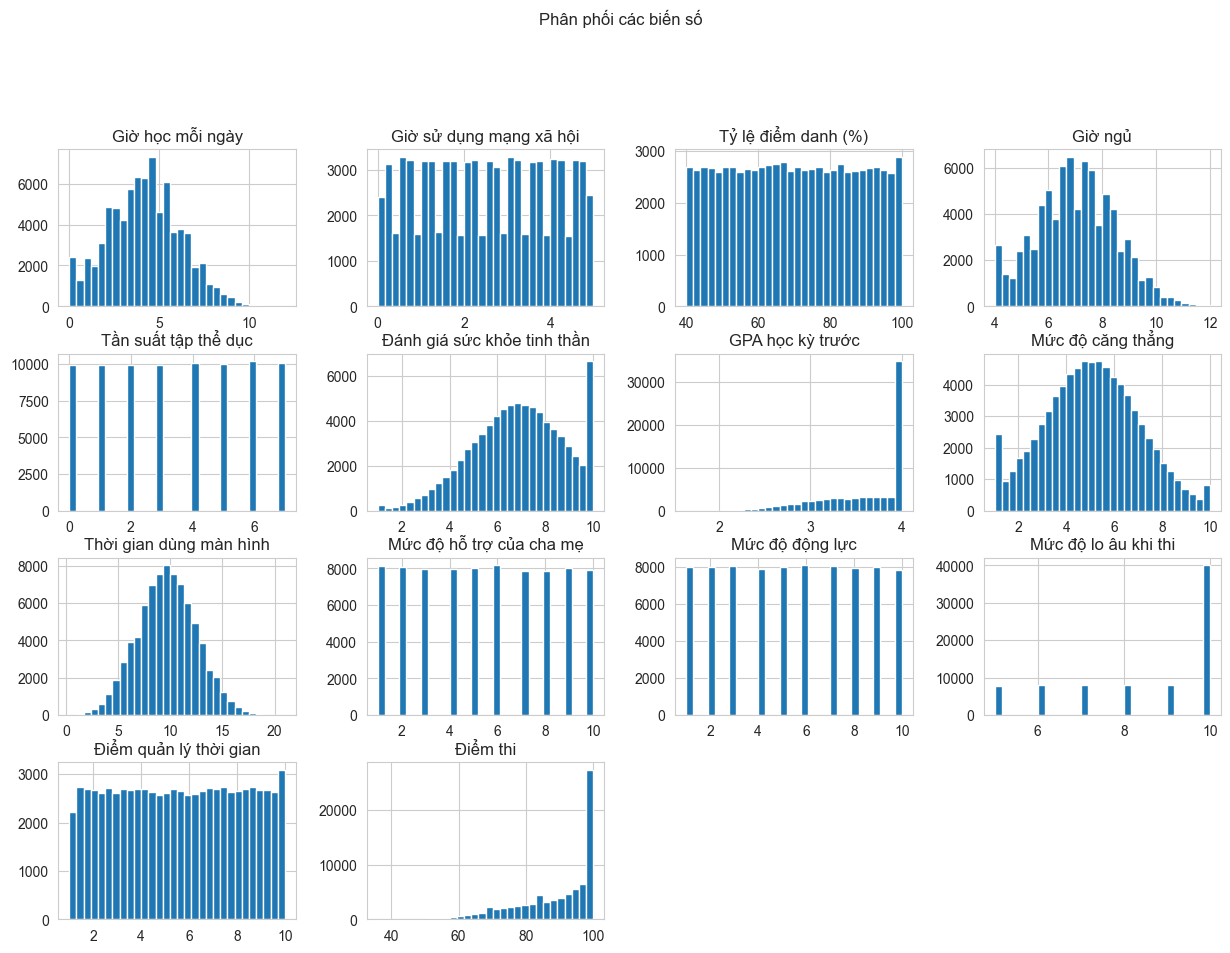

In [73]:
import matplotlib.pyplot as plt

df_vietnamese.hist(figsize=(15,10), bins=30)
plt.suptitle("Phân phối các biến số", y=1.02)
plt.show()


TRỰC QUAN HÓA DỰ LIỆU ĐIỂM THI

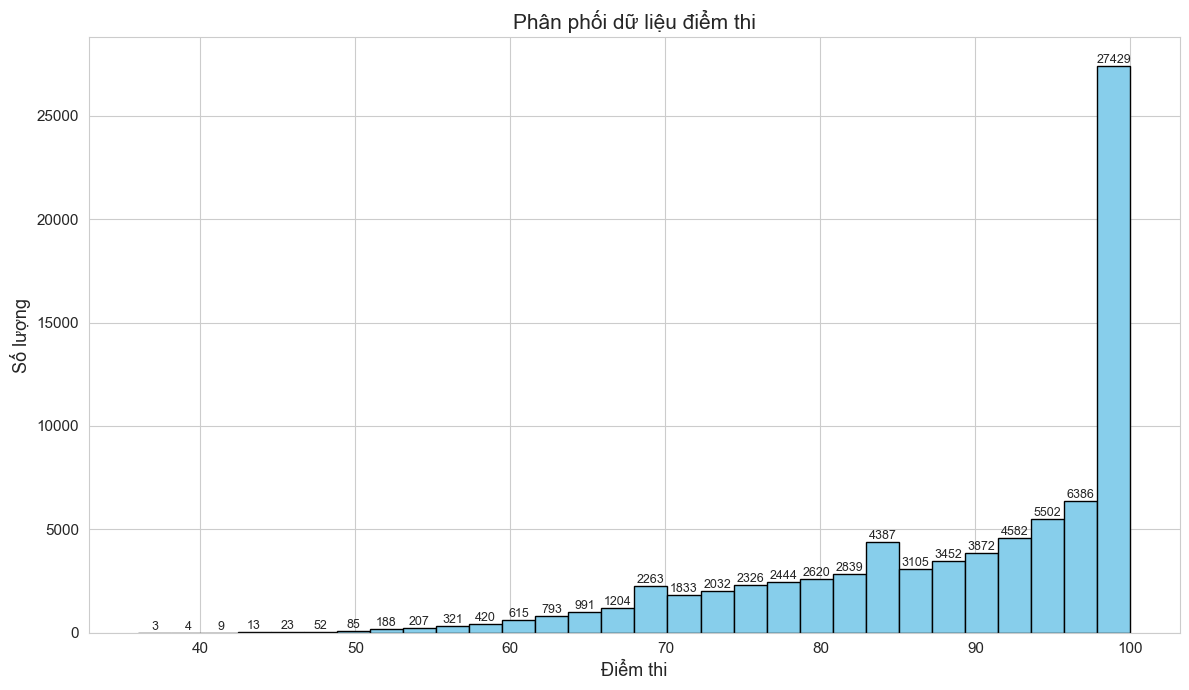

In [74]:

plt.figure(figsize=(12, 7))  

counts, bins, patches = plt.hist(
    df["exam_score"],
    bins=30,
    color="skyblue",
    edgecolor="black"
)

plt.xlabel("Điểm thi", fontsize=13)
plt.ylabel("Số lượng", fontsize=13)
plt.title("Phân phối dữ liệu điểm thi", fontsize=15)

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width() / 2,
            count,
            int(count),
            ha="center",
            va="bottom",
            fontsize=9  
        )

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout() 
plt.show()


SỐ GIỜ NGỦ CỦA SINH VIÊN

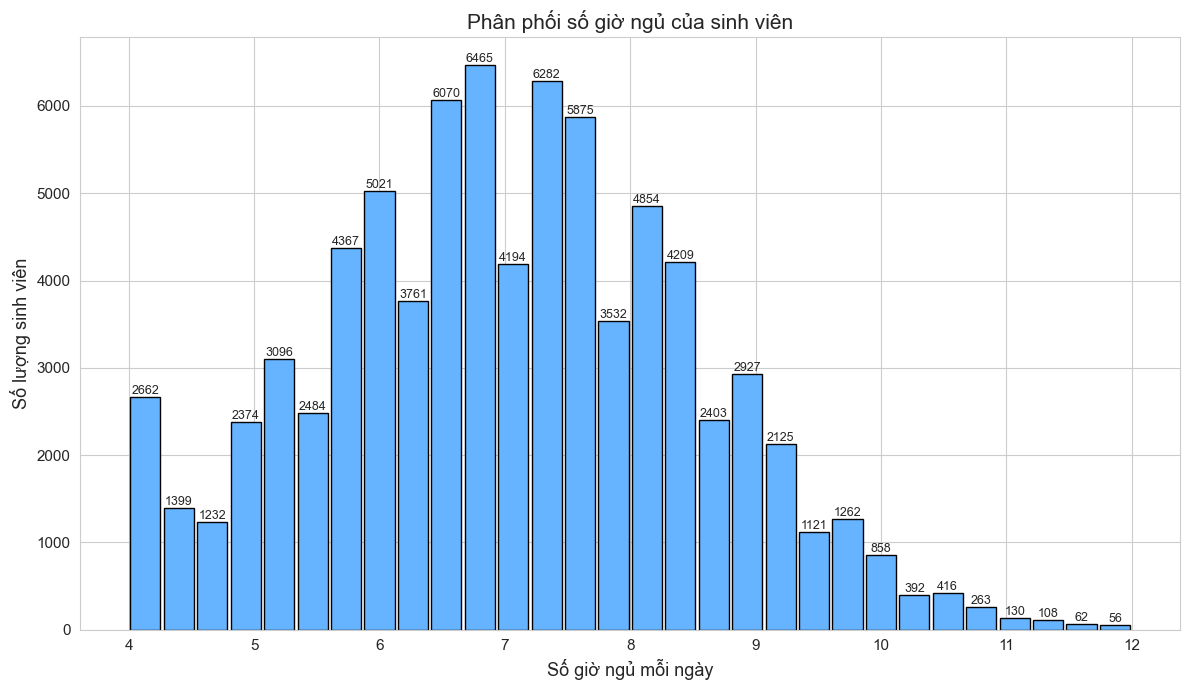

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))  

counts, bins, patches = plt.hist(
    df["sleep_hours"],
    bins=30,
    color="#66b3ff",      
    edgecolor="black",    
    rwidth=0.9           
)

plt.xlabel("Số giờ ngủ mỗi ngày", fontsize=13)
plt.ylabel("Số lượng sinh viên", fontsize=13)
plt.title("Phân phối số giờ ngủ của sinh viên", fontsize=15)

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width() / 2,
            count,
            int(count),
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()



In [76]:
print(df.columns.tolist())


['student_id', 'age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'previous_gpa', 'semester', 'stress_level', 'dropout_risk', 'social_activity', 'screen_time', 'study_environment', 'access_to_tutoring', 'family_income_range', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'learning_style', 'time_management_score', 'exam_score']


PHÂN BỐ GPA KÌ TRƯỚC

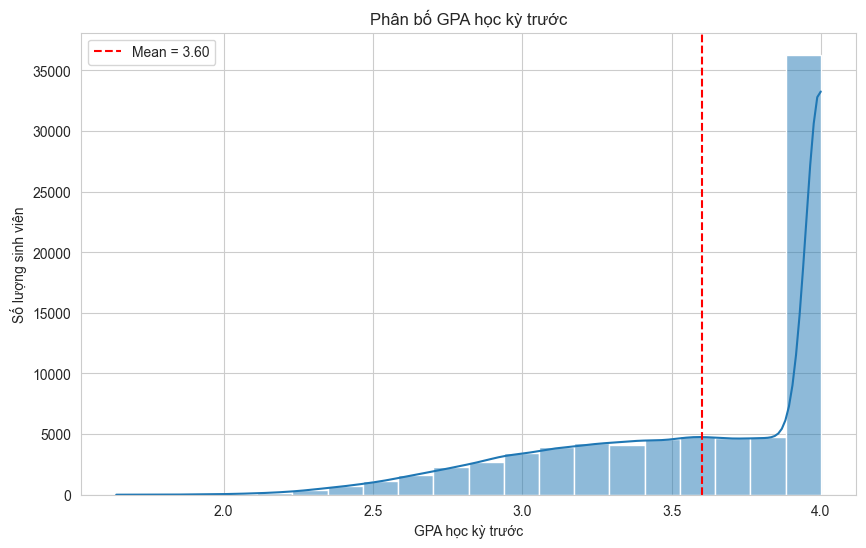

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(
    df["previous_gpa"],
    bins=20,
    kde=True
)

plt.axvline(
    df["previous_gpa"].mean(),
    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Mean = {df['previous_gpa'].mean():.2f}"
)

plt.xlabel("GPA học kỳ trước")
plt.ylabel("Số lượng sinh viên")
plt.title("Phân bố GPA học kỳ trước")
plt.legend()
plt.show()


TRỰC QUAN HÓA GIỮA GPA VÀ ĐIỂM THI

C:\Users\asus\AppData\Local\Temp\ipykernel_19424\4219821666.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpa_mean = df.groupby("gpa_group_temp")["exam_score"].mean()


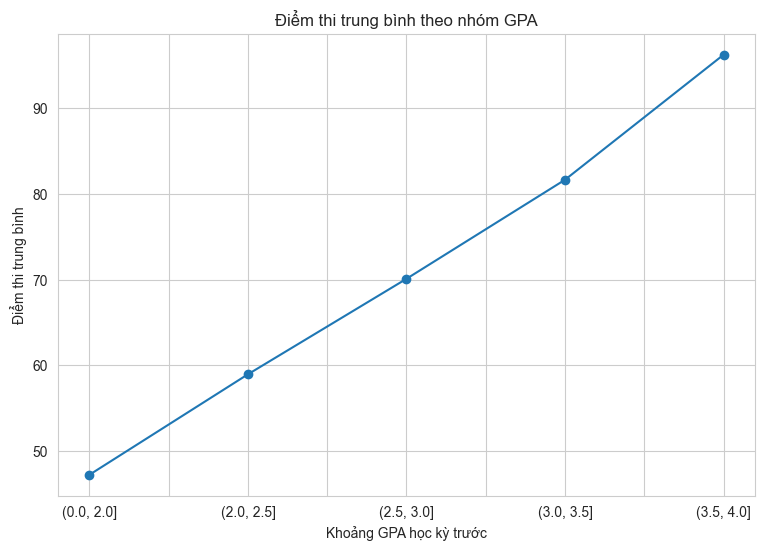

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Chia GPA thành các khoảng
df["gpa_group_temp"] = pd.cut(
    df["previous_gpa"],
    bins=[0, 2, 2.5, 3, 3.5, 4],
)

# Tính điểm thi trung bình
gpa_mean = df.groupby("gpa_group_temp")["exam_score"].mean()

plt.figure(figsize=(9, 6))
gpa_mean.plot(marker="o")

plt.xlabel("Khoảng GPA học kỳ trước")
plt.ylabel("Điểm thi trung bình")
plt.title("Điểm thi trung bình theo nhóm GPA")
plt.grid(True)
plt.show()


In [79]:
from sklearn.linear_model import LinearRegression

X = df[[
    "study_hours_per_day",
    "attendance_percentage",
    "sleep_hours"
]]

y = df["exam_score"]

model = LinearRegression()
model.fit(X, y)

for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)


study_hours_per_day : 1.3966940731967759
attendance_percentage : 0.0011328856091623826
sleep_hours : 0.7180814444740182


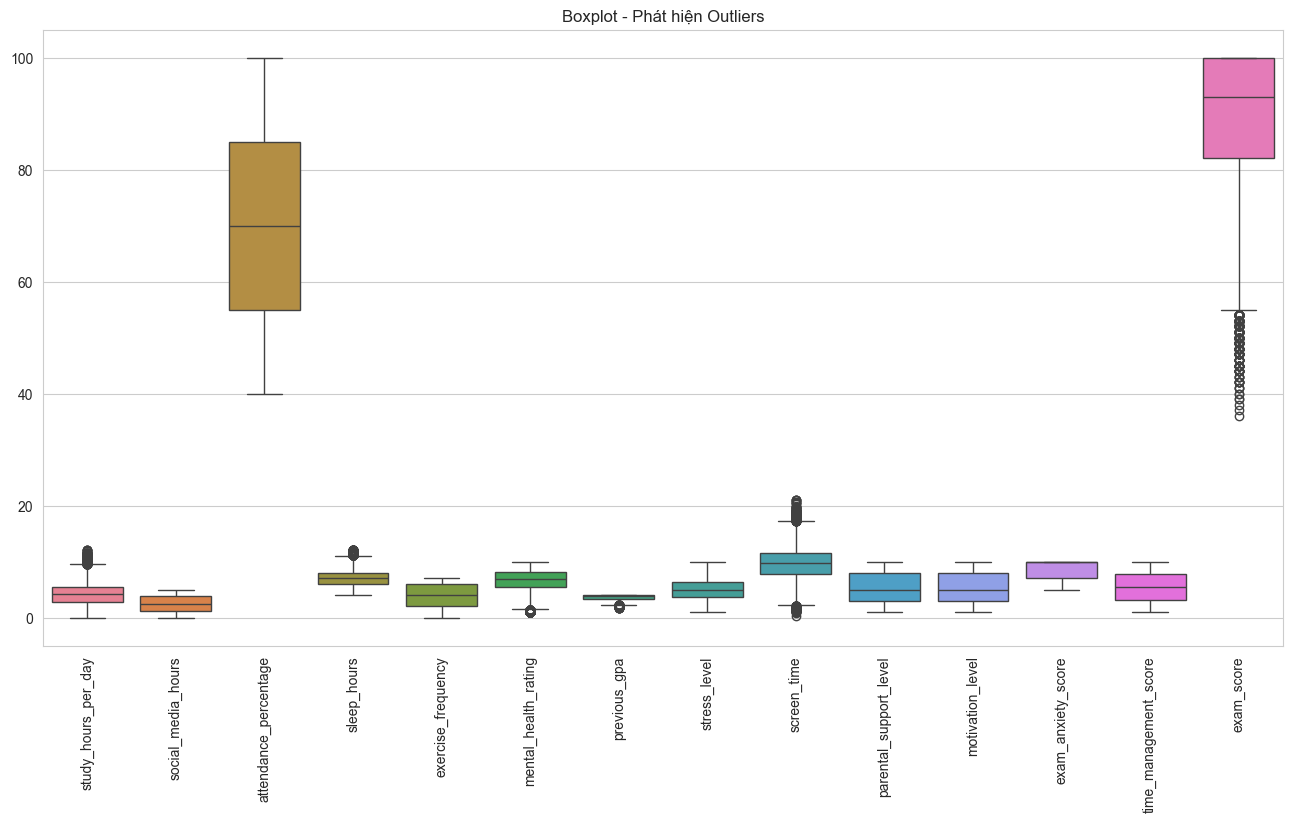

In [80]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned.select_dtypes(include=["int64","float64"]))
plt.xticks(rotation=90)
plt.title("Boxplot - Phát hiện Outliers")
plt.show()


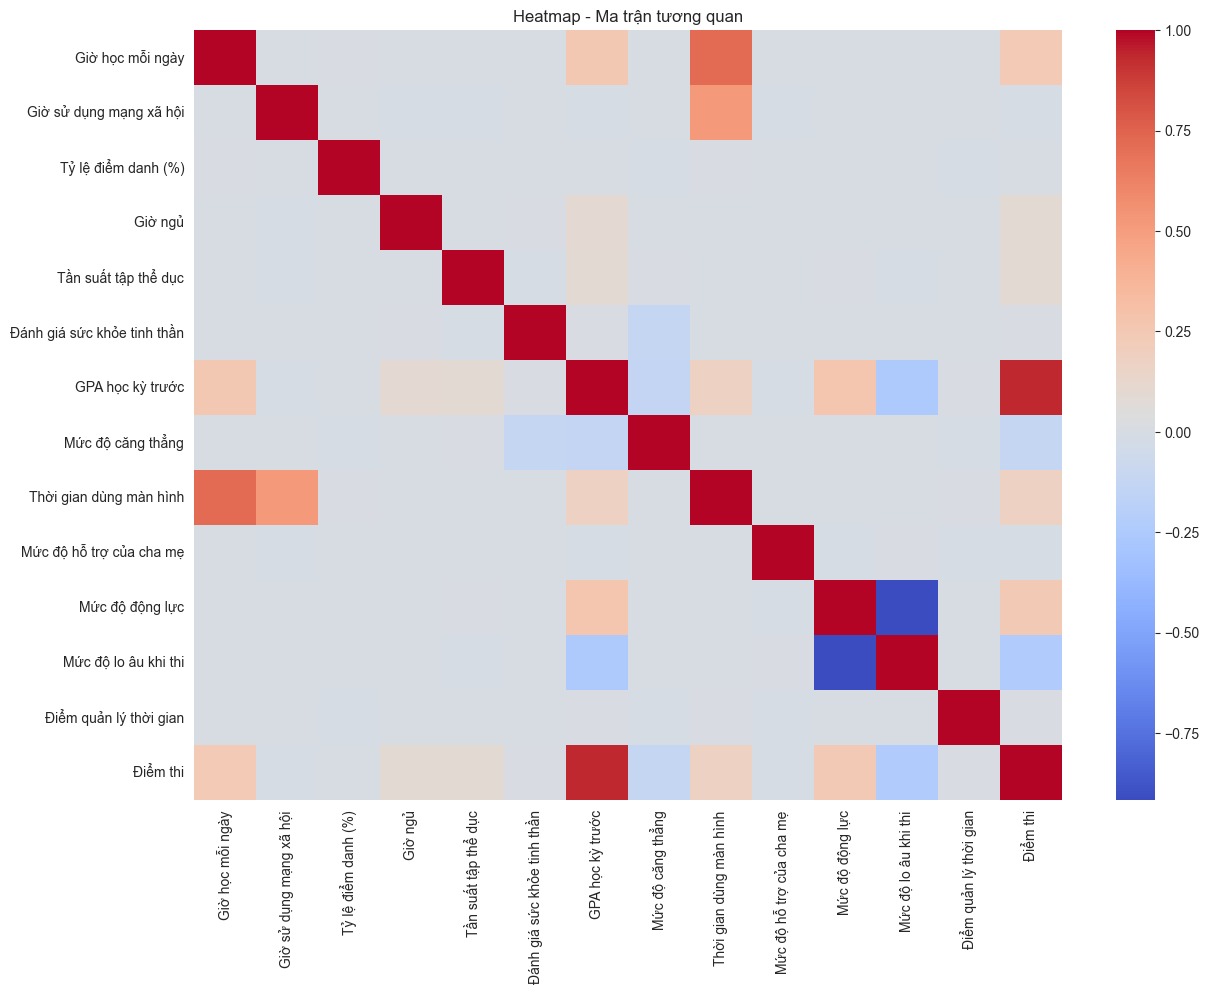

In [81]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_vietnamese.select_dtypes(include=["number"]).corr(),
            cmap="coolwarm", annot=False)
plt.title("Heatmap - Ma trận tương quan")
plt.show()


In [82]:
df_vietnamese.columns

Index(['Giờ học mỗi ngày', 'Giờ sử dụng mạng xã hội', 'Làm thêm',
       'Tỷ lệ điểm danh (%)', 'Giờ ngủ', 'Chất lượng chế độ ăn',
       'Tần suất tập thể dục', 'Đánh giá sức khỏe tinh thần',
       'GPA học kỳ trước', 'Mức độ căng thẳng', 'Nguy cơ bỏ học',
       'Thời gian dùng màn hình', 'Môi trường học tập',
       'Tiếp cận lớp phụ đạo / gia sư', 'Mức độ hỗ trợ của cha mẹ',
       'Mức độ động lực', 'Mức độ lo âu khi thi', 'Phong cách học tập',
       'Điểm quản lý thời gian', 'Điểm thi'],
      dtype='object')

In [83]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score', 'gpa_group_temp'],
      dtype='object')

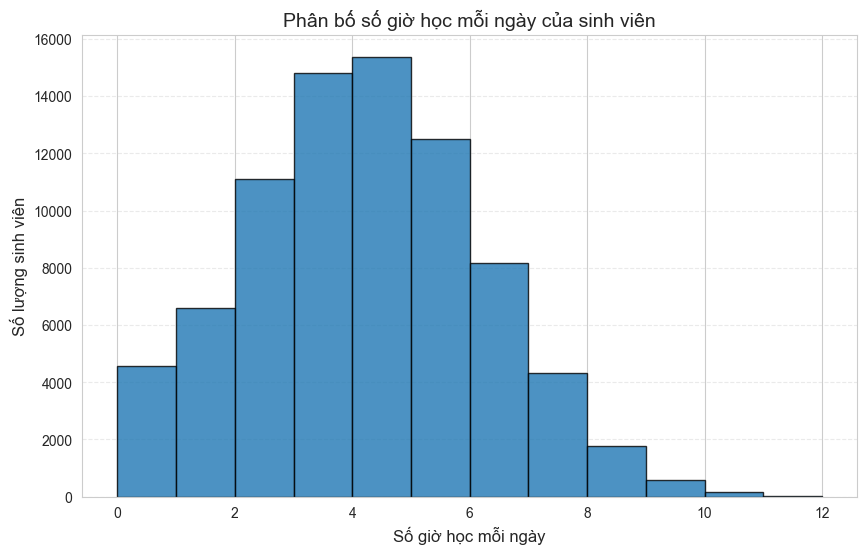

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.hist(
    df["study_hours_per_day"],
    bins=12,
    alpha=0.8,
    edgecolor="black"
)

plt.xlabel("Số giờ học mỗi ngày", fontsize=12)
plt.ylabel("Số lượng sinh viên", fontsize=12)
plt.title("Phân bố số giờ học mỗi ngày của sinh viên", fontsize=14)

plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


MỐI QUAN HỆ GIỮA GIỜ HỌC VÀ ĐIỂM THI

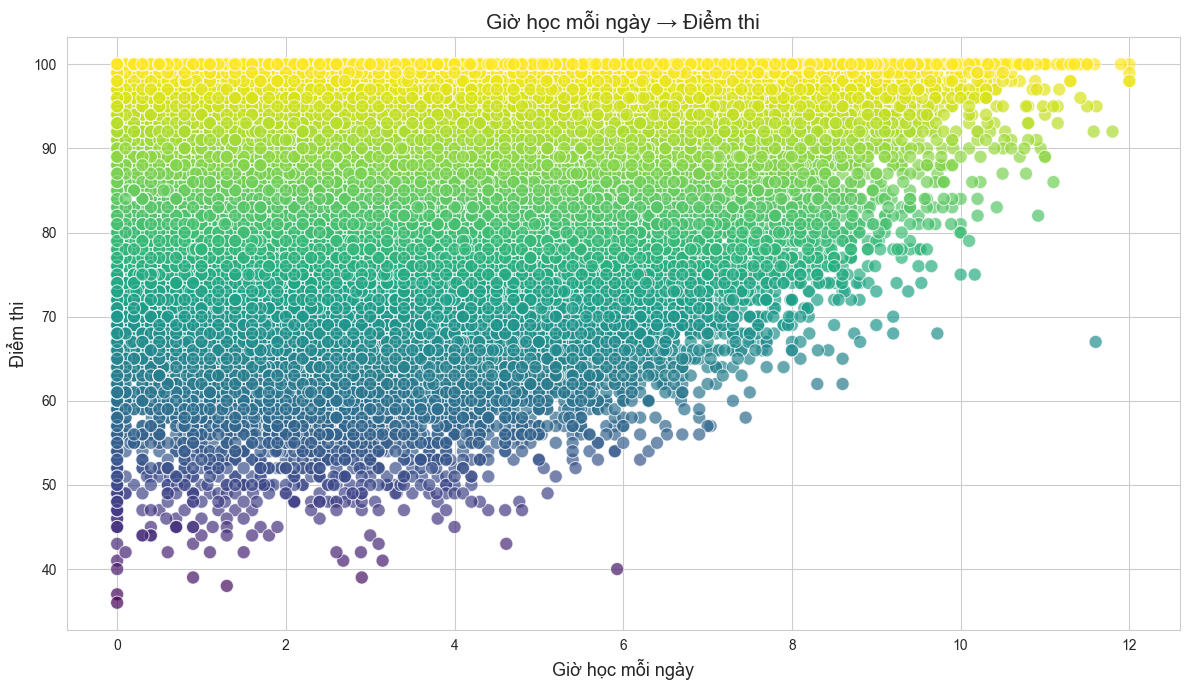

In [85]:
cols = ["Giờ học mỗi ngày"]

sns.set_style("whitegrid")

for col in cols:
    plt.figure(figsize=(12, 7))

    sns.scatterplot(
        data=df_vietnamese,
        x=col,
        y="Điểm thi",
        hue="Điểm thi",      # màu theo điểm
        palette="viridis",   # bảng màu đẹp
        alpha=0.7,
        s=90,
        legend=False         # tắt legend cho gọn
    )

    plt.title(f"{col} → Điểm thi", fontsize=15)
    plt.xlabel(col, fontsize=13)
    plt.ylabel("Điểm thi", fontsize=13)

    plt.tight_layout()
    plt.show()


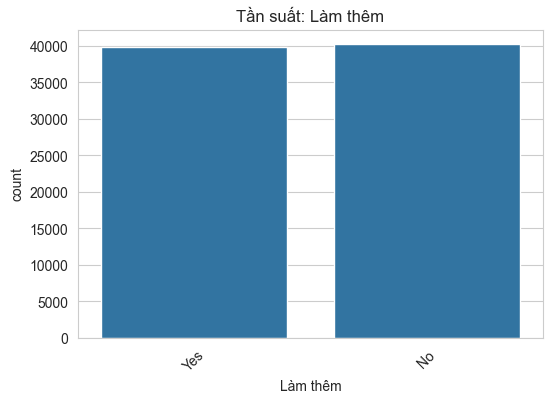

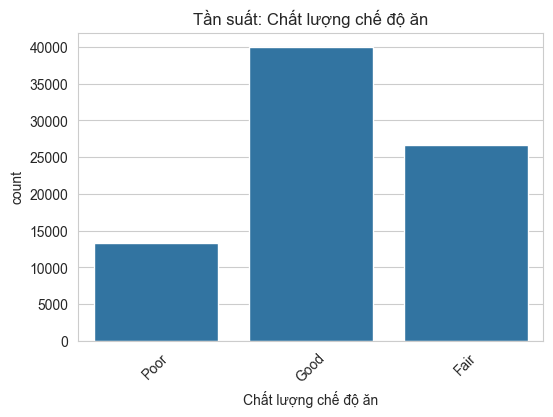

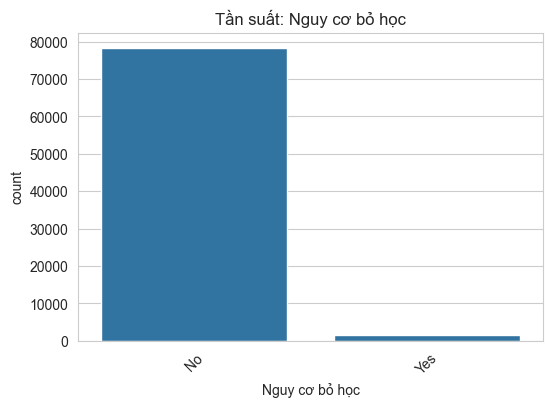

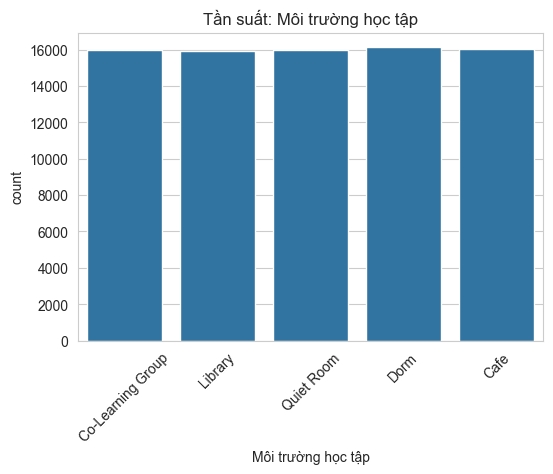

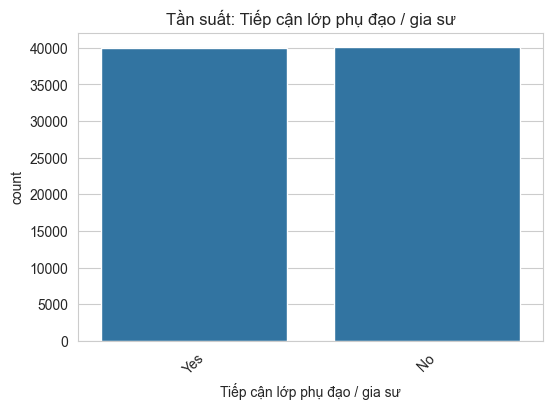

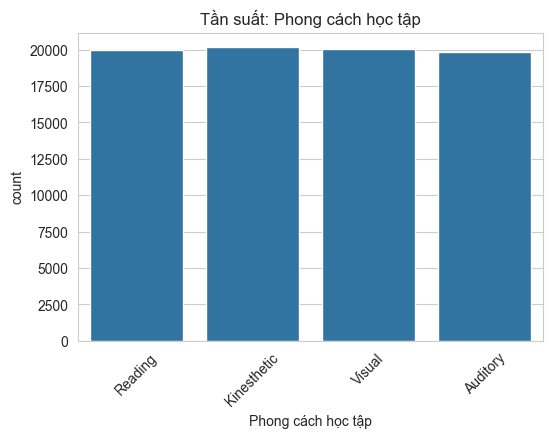

In [86]:
cat_cols = df_vietnamese.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_vietnamese, x=col)
    plt.title(f"Tần suất: {col}")
    plt.xticks(rotation=45)
    plt.show()


MỐI QUA HỆ CỦA ÁP LỰC HỌC TẬP ĐẾN ĐIỂM THI

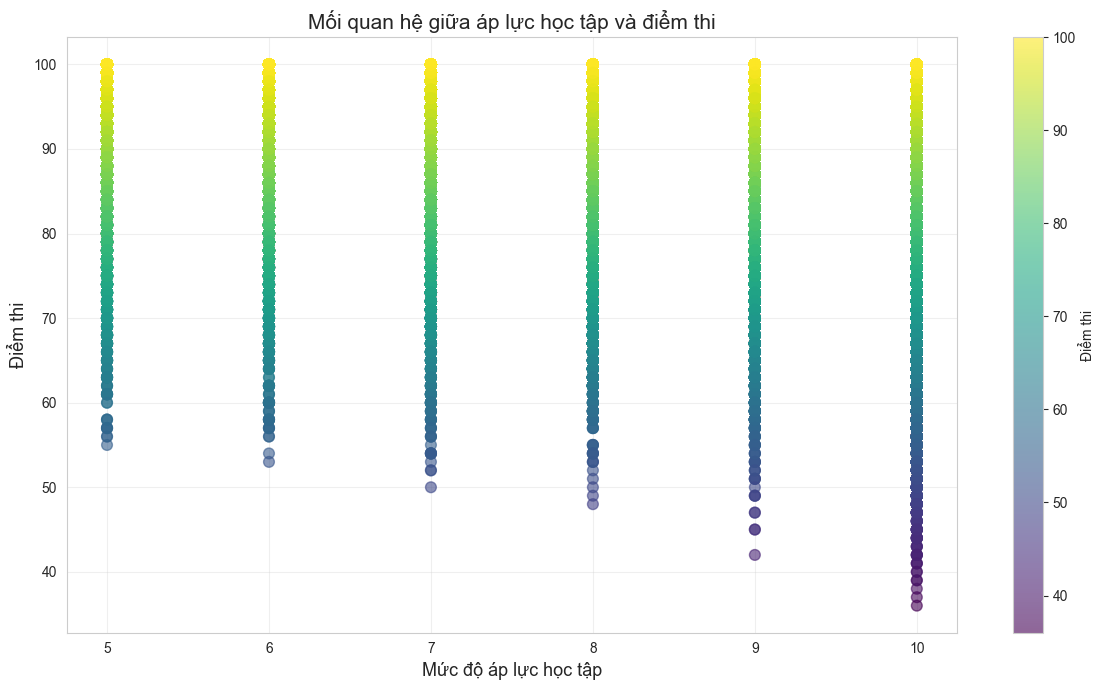

In [87]:
plt.figure(figsize=(12, 7))

sc = plt.scatter(
    df["exam_anxiety_score"],
    df["exam_score"],
    c=df["exam_score"],      # màu theo điểm thi
    cmap="viridis",          # bảng màu đẹp
    alpha=0.6,
    s=60
)

plt.colorbar(sc, label="Điểm thi")

plt.xlabel("Mức độ áp lực học tập", fontsize=13)
plt.ylabel("Điểm thi", fontsize=13)
plt.title("Mối quan hệ giữa áp lực học tập và điểm thi", fontsize=15)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


MỐI TƯƠNG QUAN GIỮA HỌC GIA SƯ VÀ KHÔNG HỌC GIA SƯ

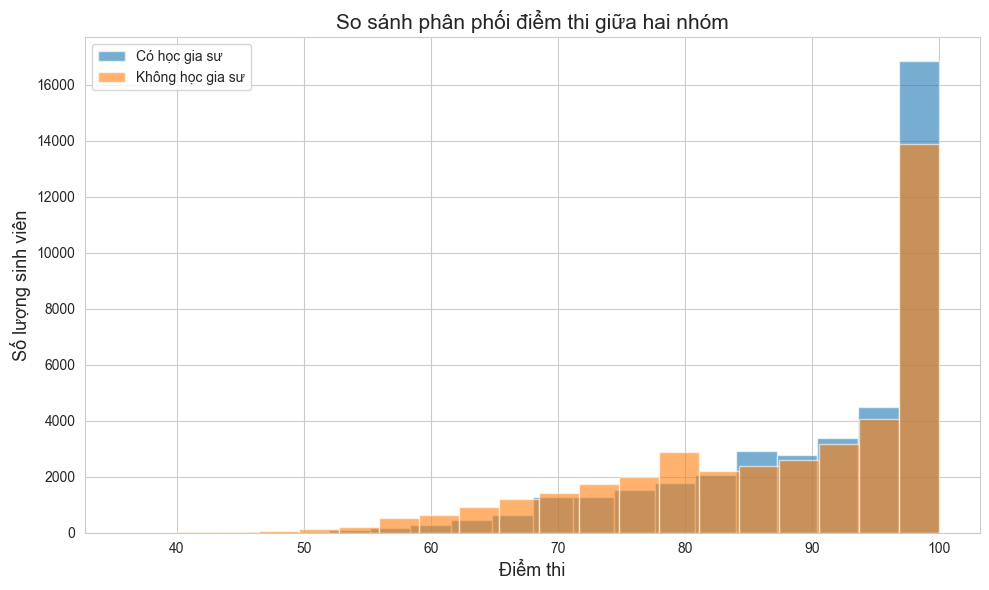

In [88]:
plt.figure(figsize=(10, 6))

plt.hist(
    df[df["access_to_tutoring"] == "Yes"]["exam_score"],
    bins=20,
    alpha=0.6,
    label="Có học gia sư"
)

plt.hist(
    df[df["access_to_tutoring"] == "No"]["exam_score"],
    bins=20,
    alpha=0.6,
    label="Không học gia sư"
)

plt.xlabel("Điểm thi", fontsize=13)
plt.ylabel("Số lượng sinh viên", fontsize=13)
plt.title("So sánh phân phối điểm thi giữa hai nhóm", fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1800x1200 with 0 Axes>

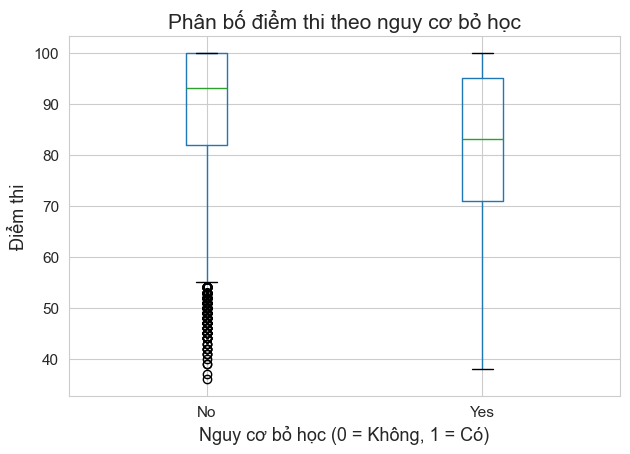

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

df.boxplot(
    column="exam_score",
    by="dropout_risk"
)

plt.xlabel("Nguy cơ bỏ học (0 = Không, 1 = Có)", fontsize=13)
plt.ylabel("Điểm thi", fontsize=13)
plt.title("Phân bố điểm thi theo nguy cơ bỏ học", fontsize=15)

plt.suptitle("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


MỐI TƯƠNG QUAN GIỮA THỜI GIAN DÙNG MẠNG XÃ HỘI VÀ ĐIỂM THI

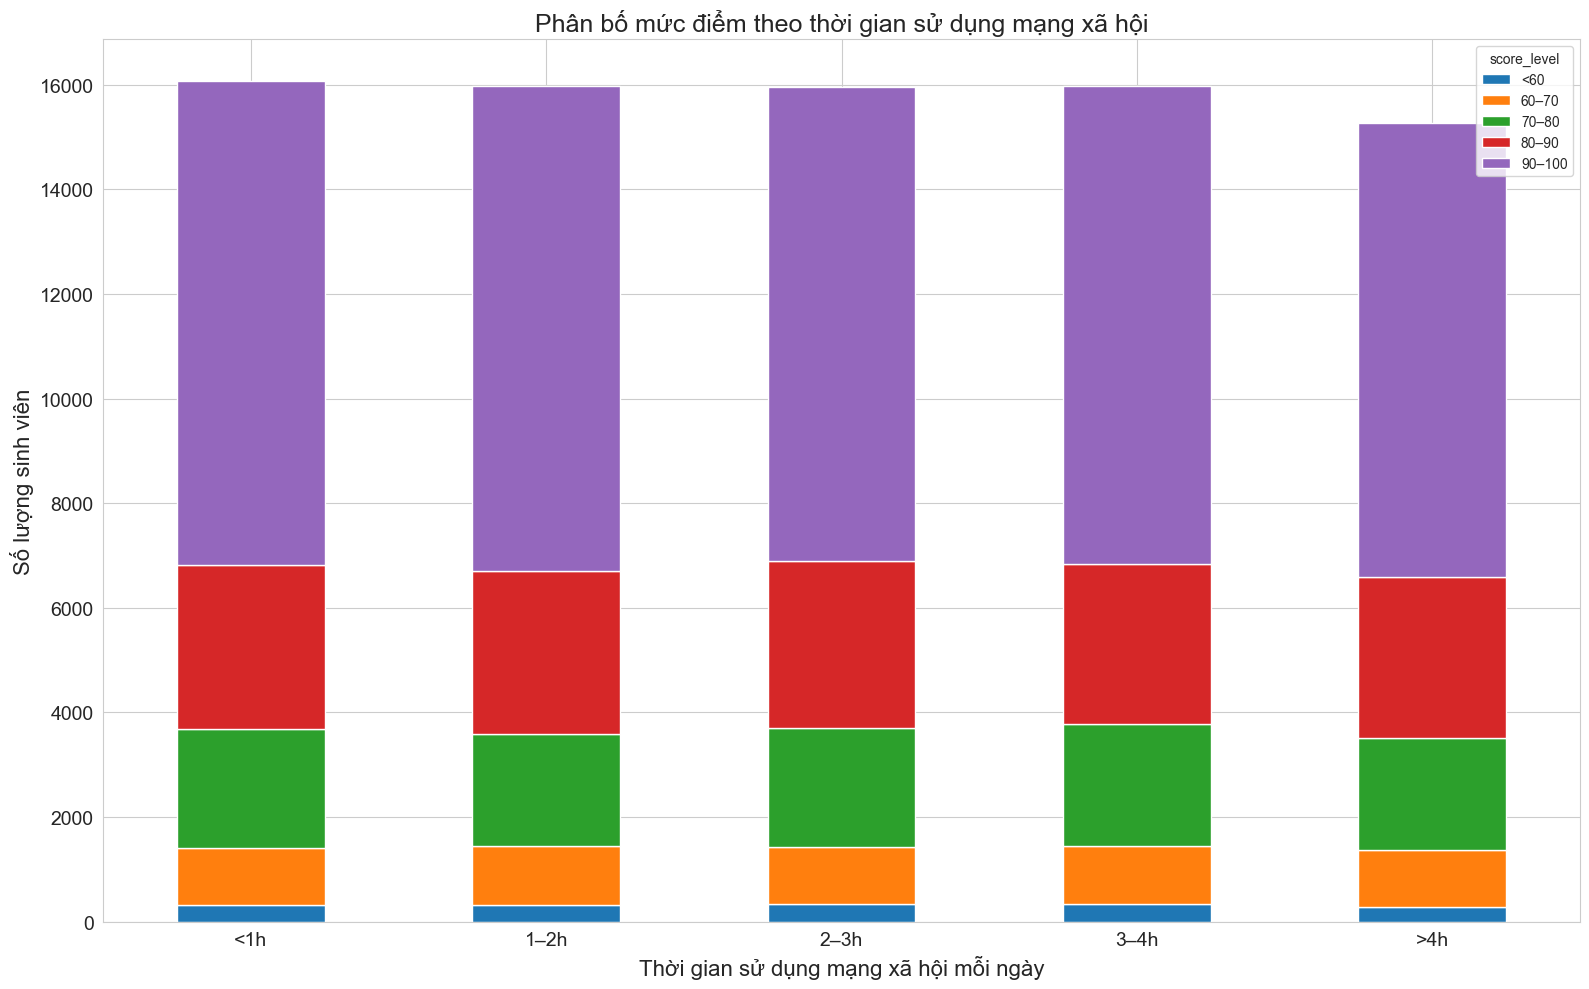

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

df["score_level"] = pd.cut(
    df["exam_score"],
    bins=[0, 60, 70, 80, 90, 100],
    labels=["<60", "60–70", "70–80", "80–90", "90–100"]
)

df["social_bin"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 1, 2, 3, 4, 24],
    labels=["<1h", "1–2h", "2–3h", "3–4h", ">4h"]
)

count_table = pd.crosstab(
    df["social_bin"],
    df["score_level"]
)

count_table.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 10)
)

plt.xlabel("Thời gian sử dụng mạng xã hội mỗi ngày", fontsize=16)
plt.ylabel("Số lượng sinh viên", fontsize=16)
plt.title("Phân bố mức điểm theo thời gian sử dụng mạng xã hội", fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_19424\2186390103.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_score = df.groupby("gpa_bin")["exam_score"].median()


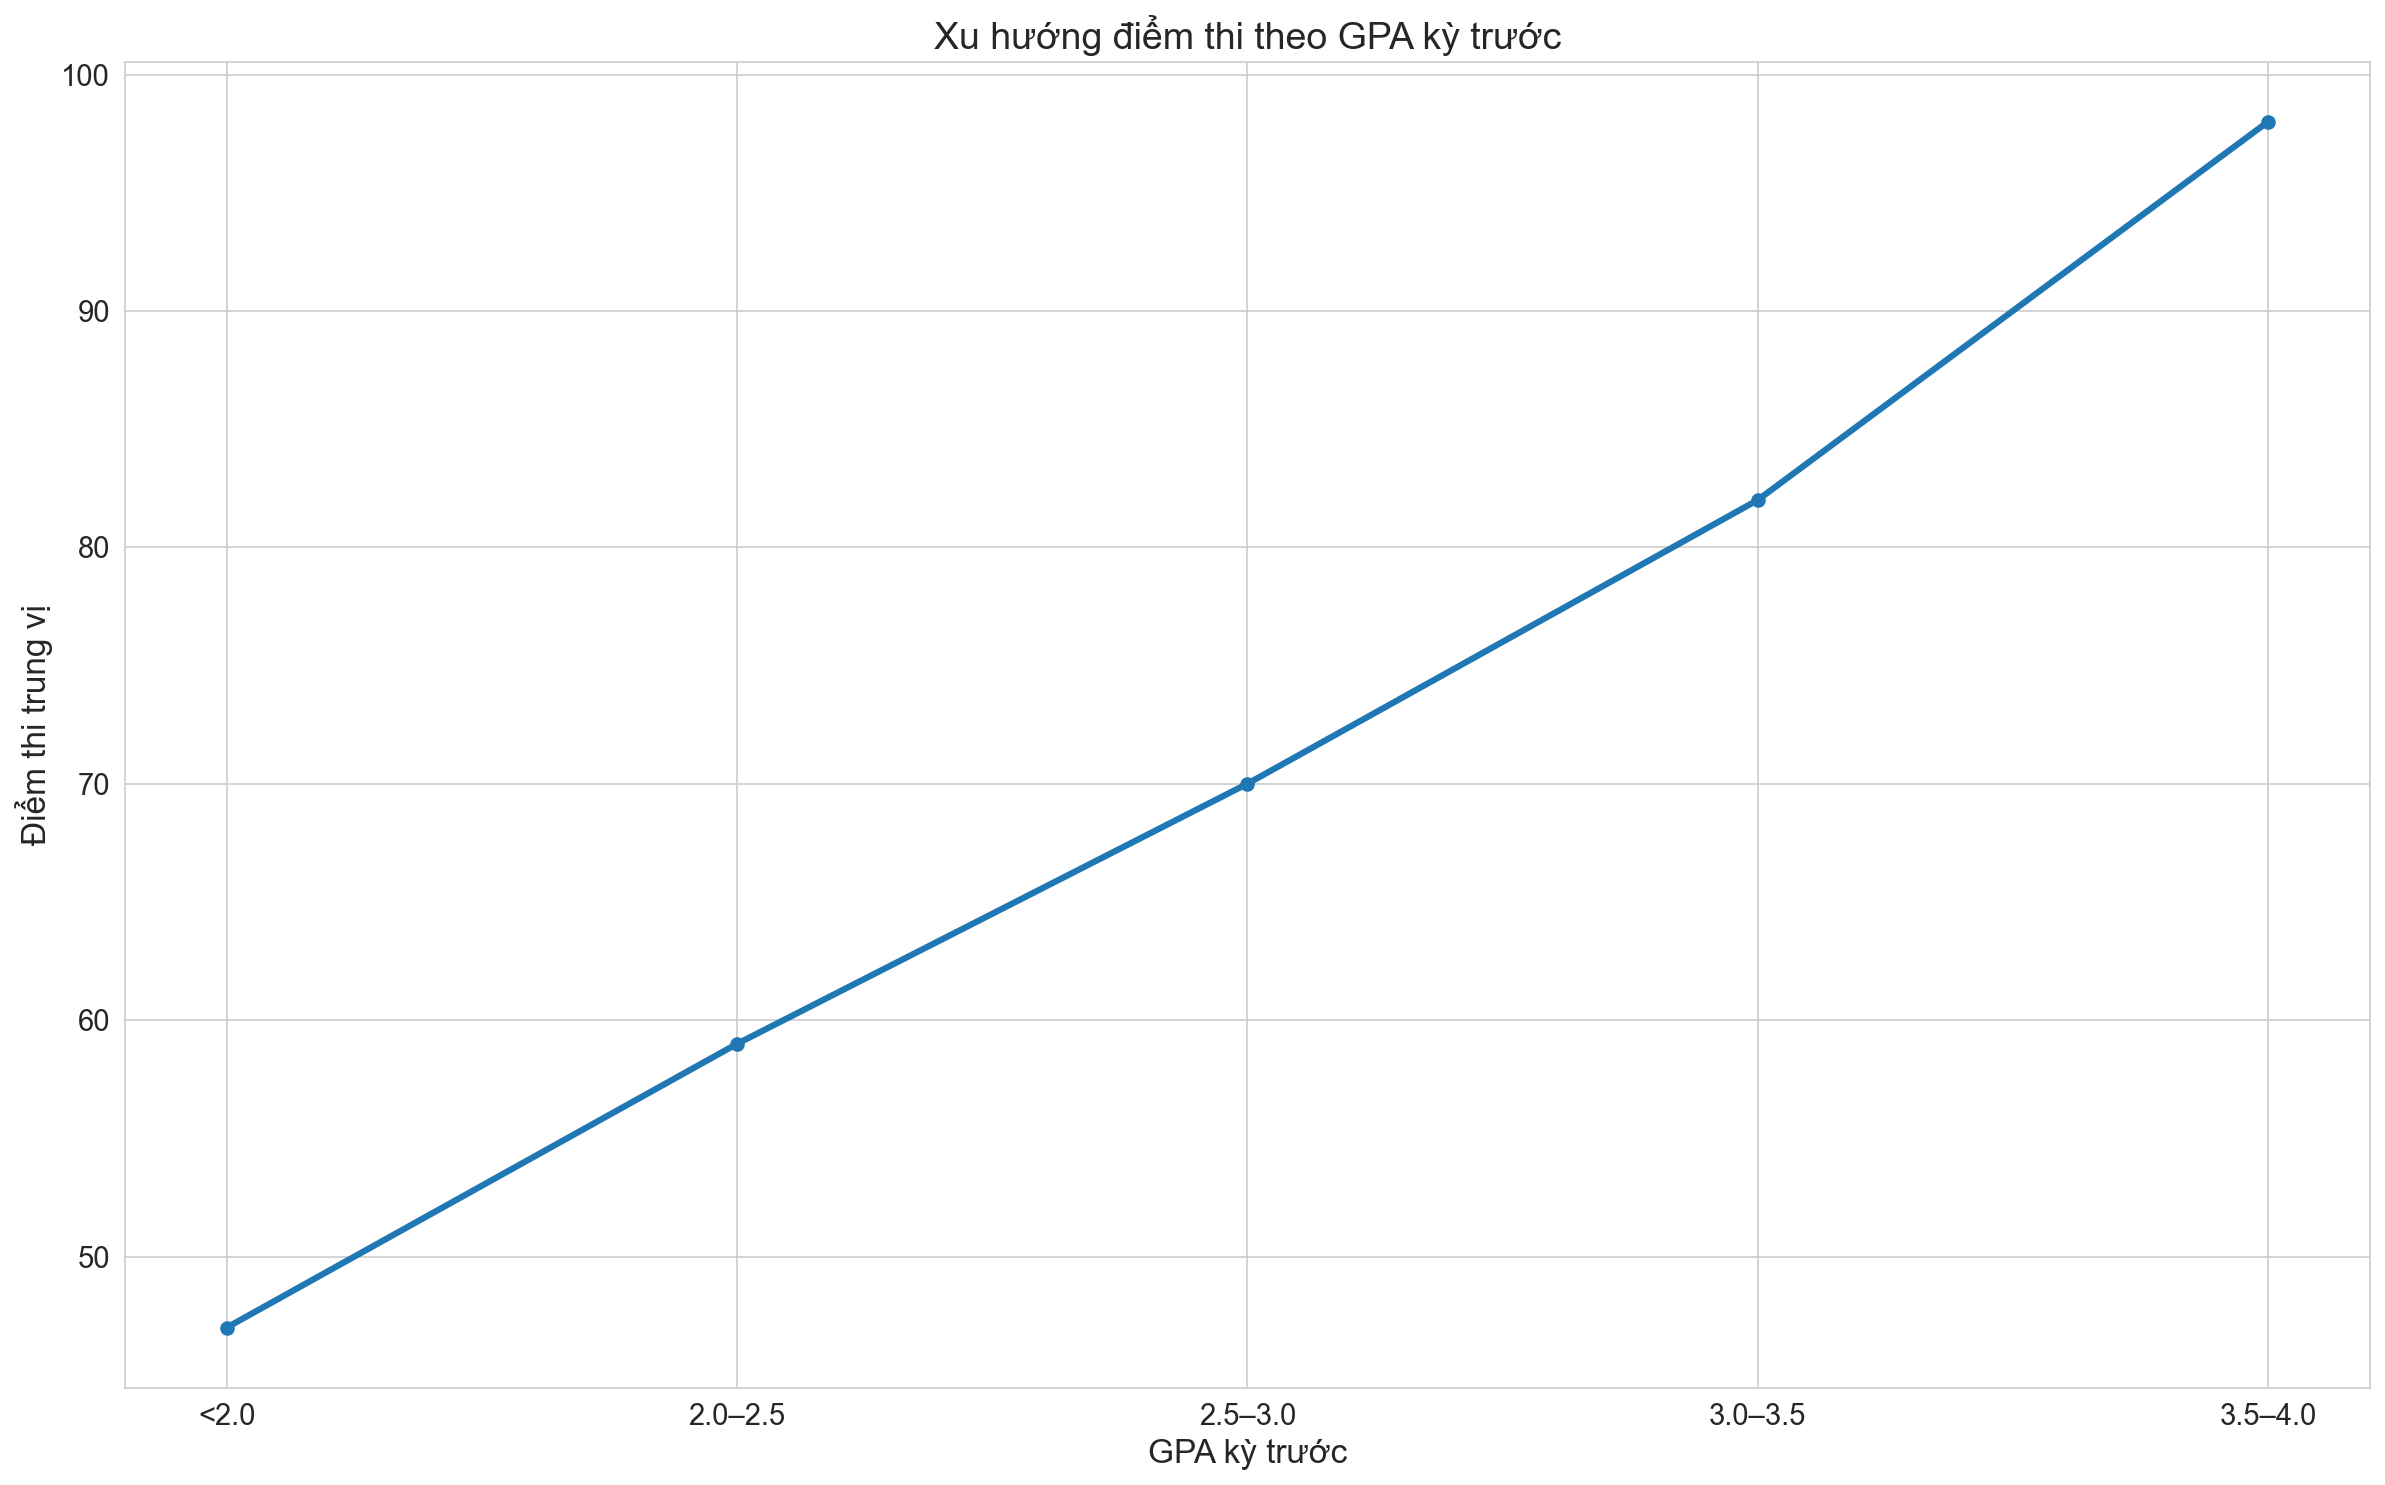

In [91]:

df["gpa_bin"] = pd.cut(
    df["previous_gpa"],
    bins=[0, 2, 2.5, 3, 3.5, 4],
    labels=["<2.0", "2.0–2.5", "2.5–3.0", "3.0–3.5", "3.5–4.0"]
)
median_score = df.groupby("gpa_bin")["exam_score"].median()

plt.figure(figsize=(16, 10), dpi=150)

plt.plot(
    median_score.index,
    median_score.values,
    marker="o",
    linewidth=3
)

plt.xlabel("GPA kỳ trước", fontsize=16)
plt.ylabel("Điểm thi trung vị", fontsize=16)
plt.title("Xu hướng điểm thi theo GPA kỳ trước", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


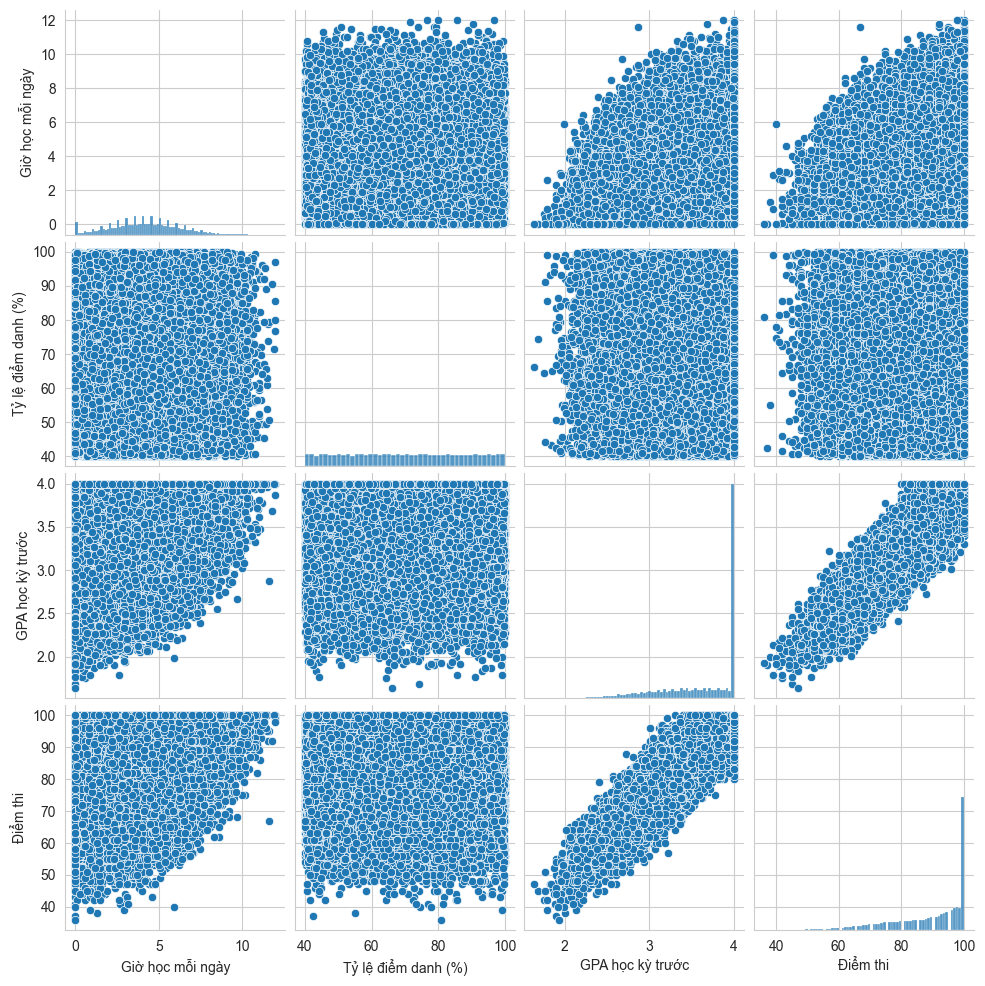

In [92]:
sns.pairplot(df_vietnamese[["Giờ học mỗi ngày",
                            "Tỷ lệ điểm danh (%)",
                            "GPA học kỳ trước",
                            "Điểm thi"]])
plt.show()


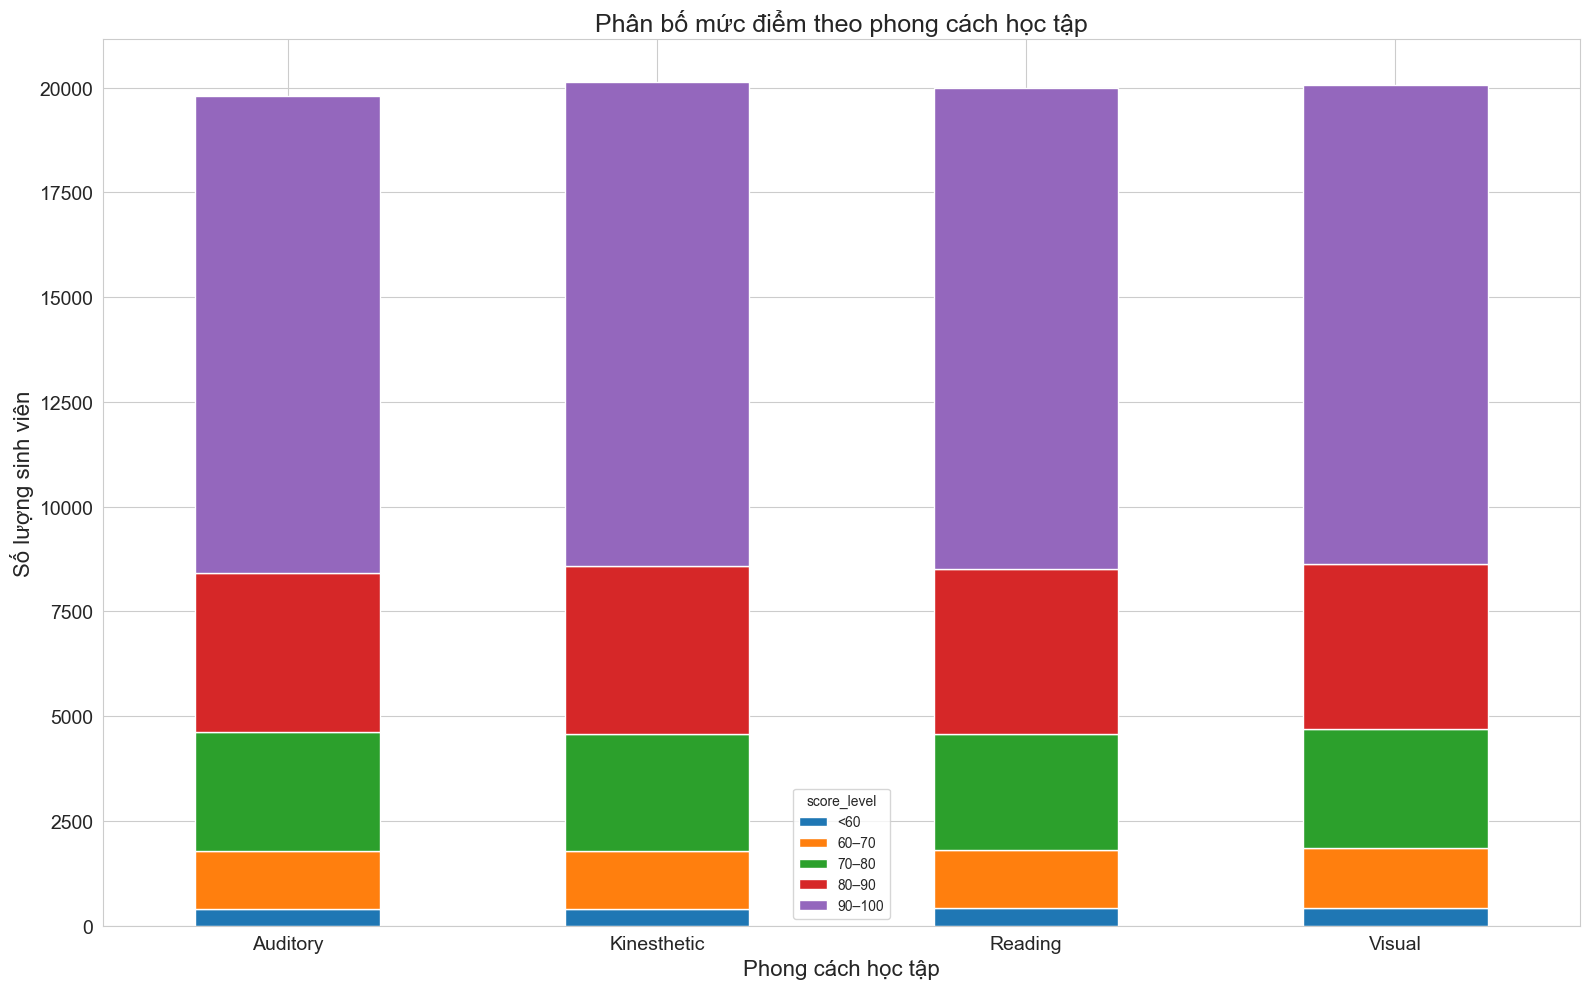

In [93]:
df["score_level"] = pd.cut(
    df["exam_score"],
    bins=[0, 60, 70, 80, 90, 100],
    labels=["<60", "60–70", "70–80", "80–90", "90–100"]
)
count_table = pd.crosstab(
    df["learning_style"],
    df["score_level"]
)
count_table.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 10)
)

plt.xlabel("Phong cách học tập", fontsize=16)
plt.ylabel("Số lượng sinh viên", fontsize=16)
plt.title("Phân bố mức điểm theo phong cách học tập", fontsize=18)

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


MỐI QUAN HỆ CHẾ ĐỘ ĐỒ ĂN VỚI ĐIỂM THI

MỐI TƯƠNG QUAN GIỮA ĐI LÀM THÊM HAY KHÔNG VÀ ĐIỂM THI

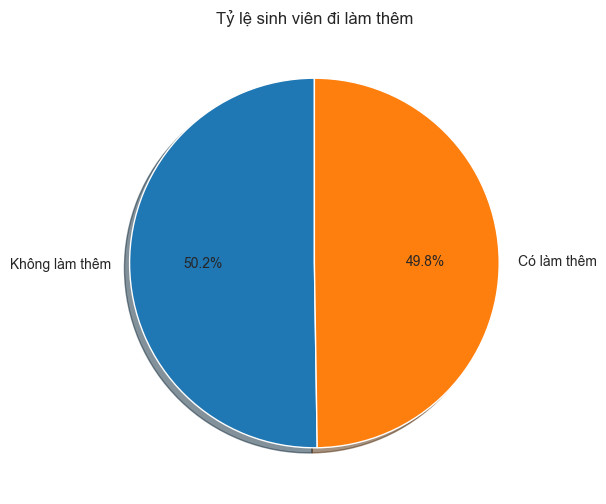

In [94]:
import matplotlib.pyplot as plt

counts = df["part_time_job"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=["Không làm thêm", "Có làm thêm"],
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)

plt.title("Tỷ lệ sinh viên đi làm thêm")
plt.show()


<Figure size 800x600 with 0 Axes>

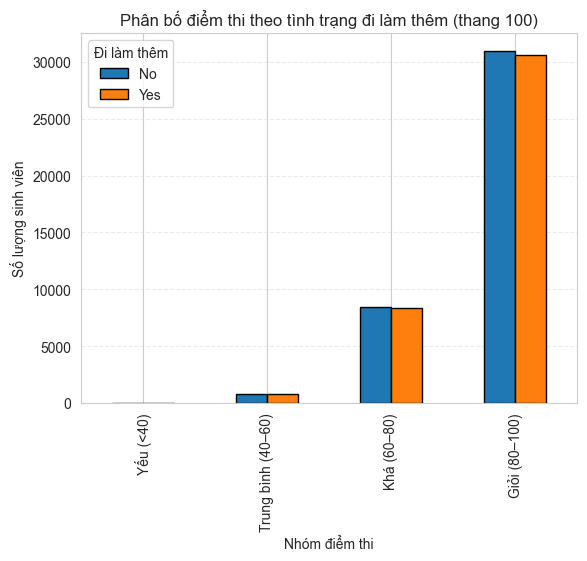

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Chia điểm thi (thang 100) thành các mức
bins = [0, 40, 60, 80, 100]
labels = ["Yếu (<40)", "Trung bình (40–60)", "Khá (60–80)", "Giỏi (80–100)"]

df["exam_score_group"] = pd.cut(
    df["exam_score"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Đếm số sinh viên theo nhóm điểm & đi làm thêm
count_data = pd.crosstab(
    df["exam_score_group"],
    df["part_time_job"]
)

# ÉP KIỂU SỐ (SỬA LỖI no numeric data)
count_data = count_data.astype(int)

# Vẽ biểu đồ cột
plt.figure(figsize=(8,6))
count_data.plot(
    kind="bar",
    edgecolor="black"
)

plt.xlabel("Nhóm điểm thi")
plt.ylabel("Số lượng sinh viên")
plt.title("Phân bố điểm thi theo tình trạng đi làm thêm (thang 100)")
plt.legend(title="Đi làm thêm")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


MỐI QUAN HỆ GIỮA TẦN SUẤT TẬP THỂ DỤC VÀ ĐIỂM THI

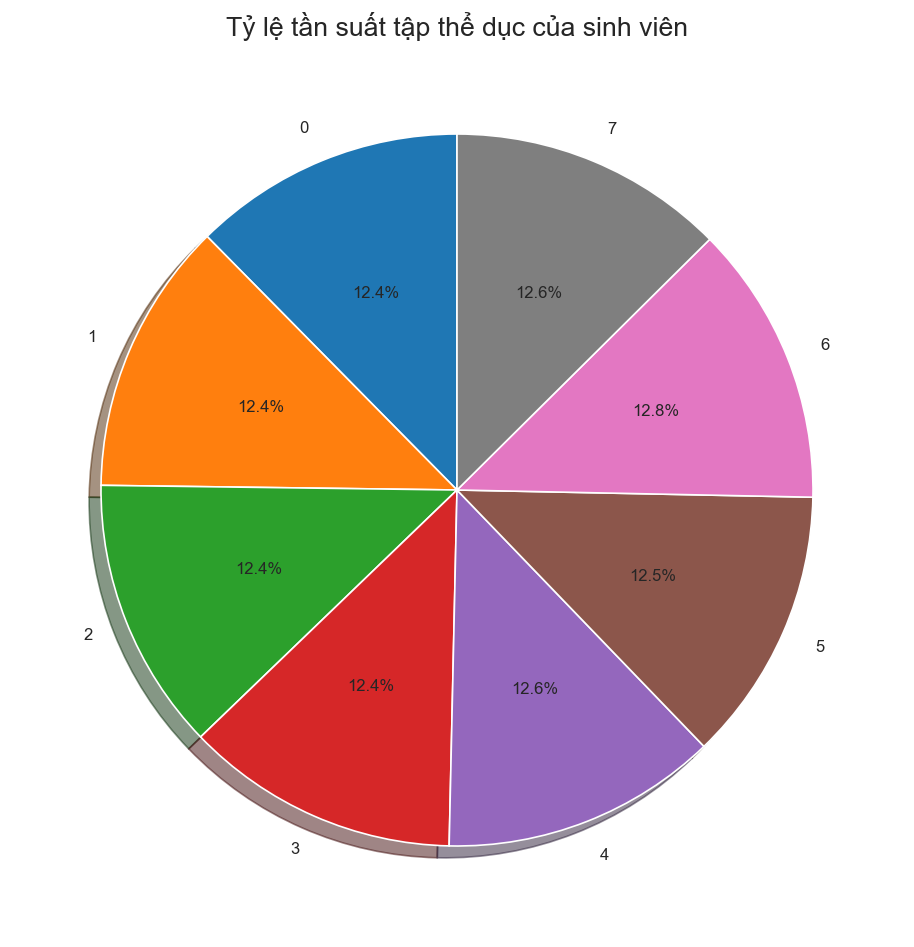

In [96]:
import matplotlib.pyplot as plt

counts = df["exercise_frequency"].value_counts().sort_index()

plt.figure(figsize=(8,8), dpi=120)
plt.pie(
    counts.values,
    labels=counts.index.astype(str),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)

plt.title("Tỷ lệ tần suất tập thể dục của sinh viên", fontsize=16)
plt.tight_layout()
plt.show()


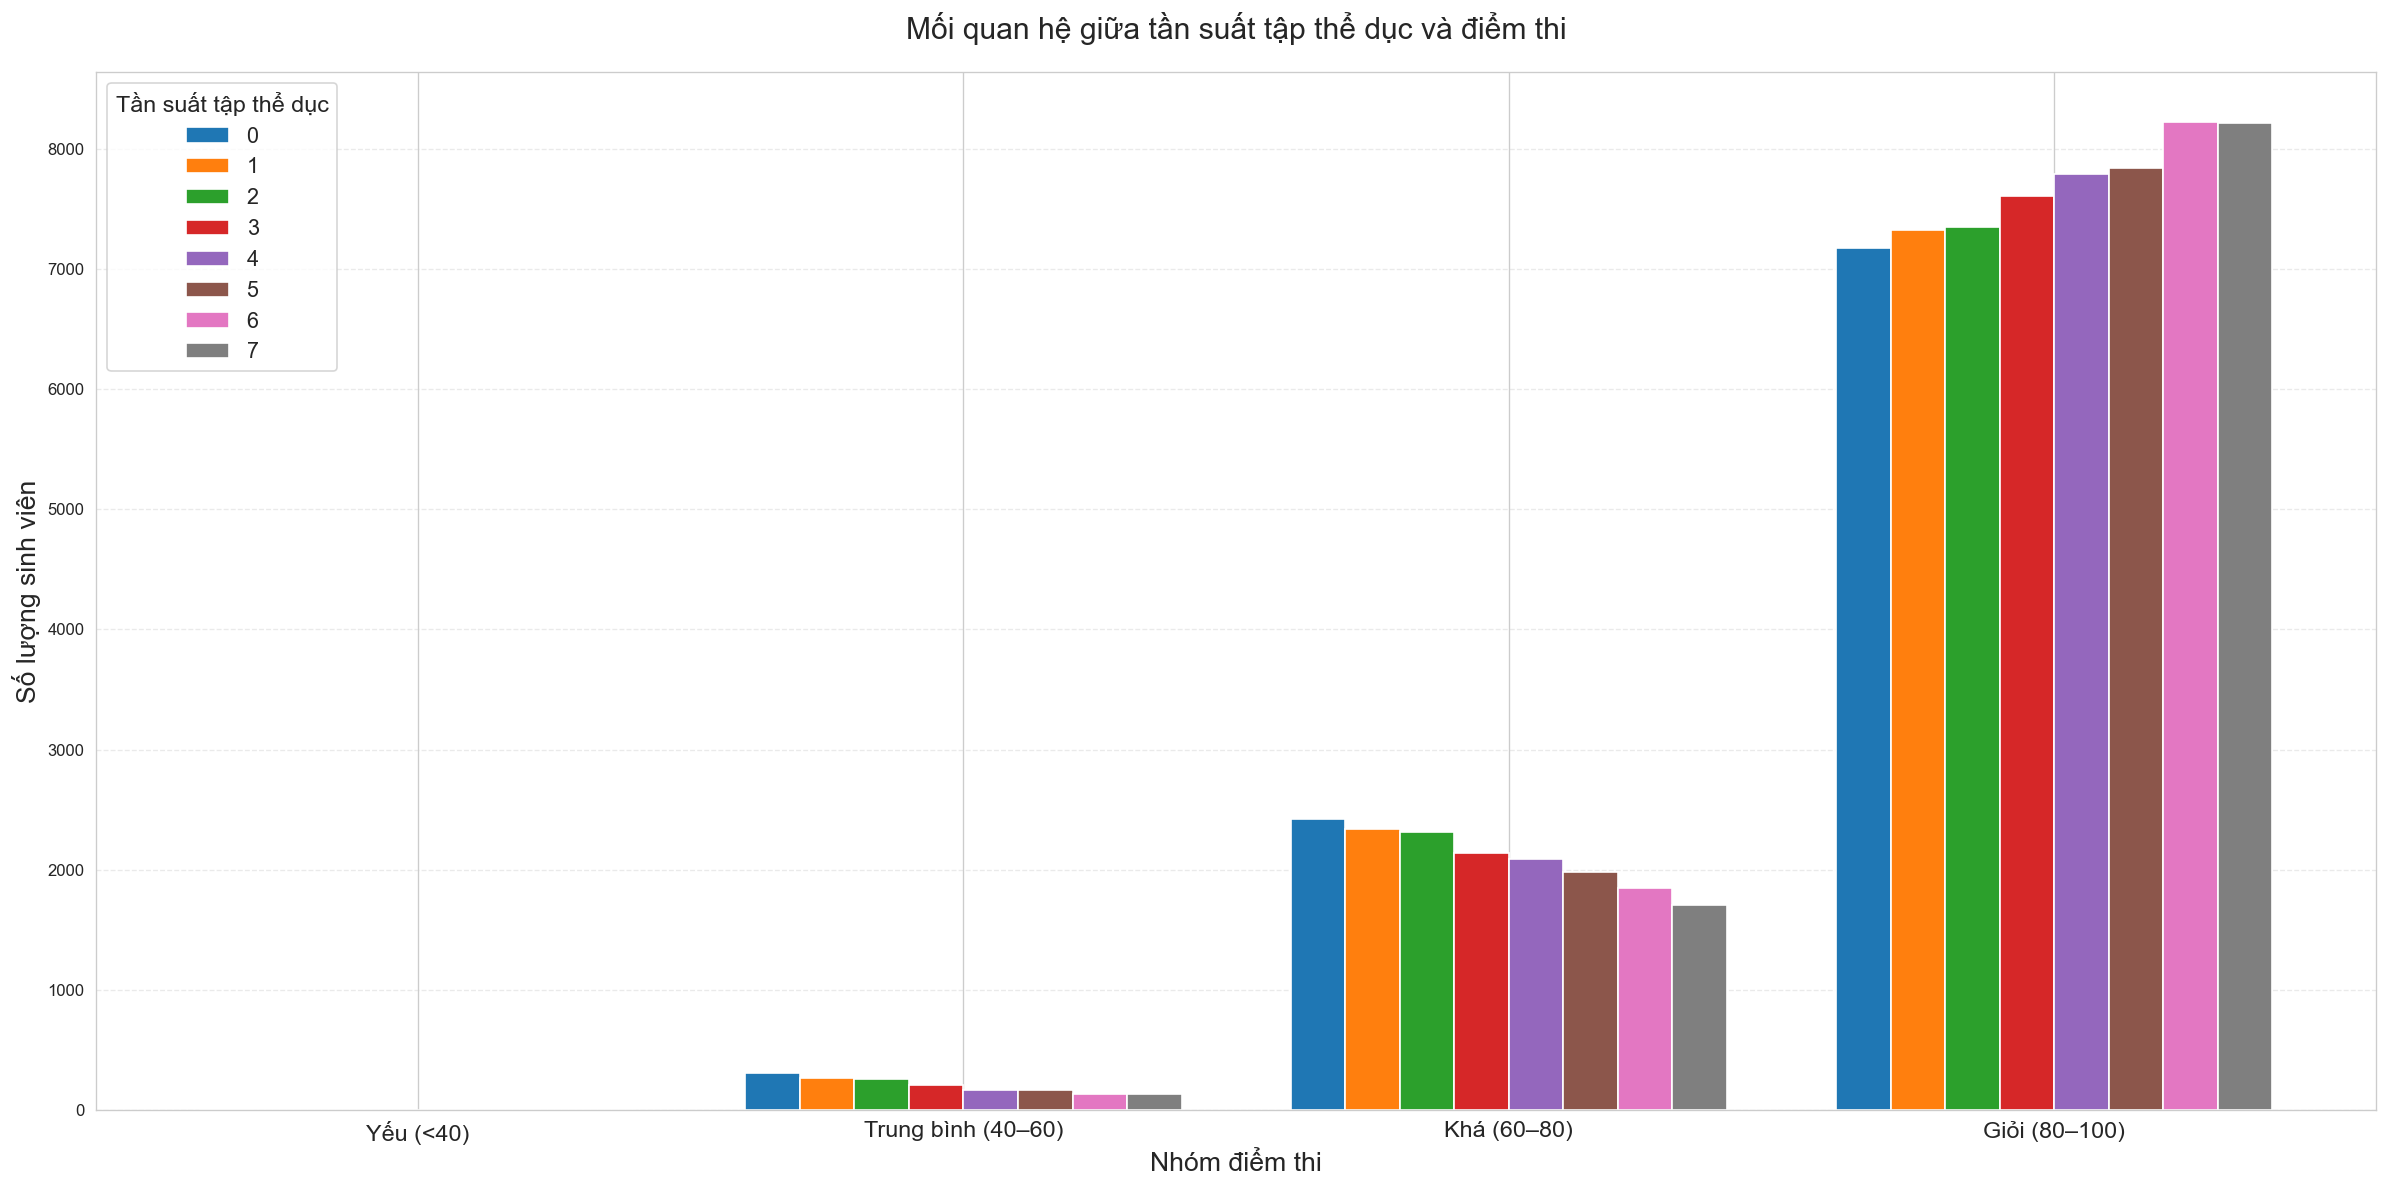

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chia điểm thi theo thang 100
bins = [0, 40, 60, 80, 100]
labels = ["Yếu (<40)", "Trung bình (40–60)", "Khá (60–80)", "Giỏi (80–100)"]

df["exam_score_group"] = pd.cut(
    df["exam_score"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Đếm số sinh viên theo nhóm điểm & tần suất tập thể dục
count_data = pd.crosstab(
    df["exam_score_group"],
    df["exercise_frequency"]
).astype(int)

# ===== VẼ BIỂU ĐỒ CỘT (GROUPED BAR) =====
fig, ax = plt.subplots(figsize=(20, 10), dpi=120)  # TO + RÕ

x = np.arange(len(count_data.index))               # vị trí nhóm điểm
n_cols = len(count_data.columns)
bar_width = 0.8 / n_cols                           # độ rộng mỗi cột

for i, col in enumerate(count_data.columns):
    ax.bar(
        x + i * bar_width,
        count_data[col].values,
        width=bar_width,
        label=f"{col}"
    )

# Cấu hình trục & chữ
ax.set_xticks(x + bar_width * (n_cols - 1) / 2)
ax.set_xticklabels(count_data.index, fontsize=14)

ax.set_xlabel("Nhóm điểm thi", fontsize=16)
ax.set_ylabel("Số lượng sinh viên", fontsize=16)
ax.set_title(
    "Mối quan hệ giữa tần suất tập thể dục và điểm thi",
    fontsize=18,
    pad=20
)

# Legend to, rõ
ax.legend(
    title="Tần suất tập thể dục",
    title_fontsize=14,
    fontsize=13,
    loc="upper left"
)

ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


MỐI QUAN HỆ CỦA QUẢN LÝ THỜI GIAN VÀ ĐIỂM THI

In [98]:
import pandas as pd

# Lọc điểm quản lý thời gian từ 1 đến 10
df_tm = df[df["time_management_score"].between(1, 10)].copy()

# Chia điểm thi theo thang 100
bins_exam = [0, 40, 60, 80, 100]
labels_exam = ["Yếu", "Trung bình", "Khá", "Giỏi"]

df_tm["exam_score_group"] = pd.cut(
    df_tm["exam_score"],
    bins=bins_exam,
    labels=labels_exam,
    include_lowest=True
)

# Bảng đếm
count_table = pd.crosstab(
    df_tm["time_management_score"],
    df_tm["exam_score_group"]
)

# Chỉ lấy Trung bình – Khá – Giỏi
count_table = count_table[["Trung bình", "Khá", "Giỏi"]]

# Tính tỷ lệ %
percent_table = count_table.div(count_table.sum(axis=1), axis=0) * 100

# Làm tròn 2 chữ số
percent_table = percent_table.round(2)

# Đảm bảo đủ 1–10 trên trục
percent_table = percent_table.reindex(range(1, 11), fill_value=0)

# Hiển thị bảng TO – RÕ
percent_table.style \
    .set_caption("Tỷ lệ (%) sinh viên Trung bình – Khá – Giỏi theo từng mức quản lý thời gian (1–10)") \
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "18px"), ("font-weight", "bold")]},
        {"selector": "th", "props": [("font-size", "14px"), ("text-align", "center")]},
        {"selector": "td", "props": [("font-size", "14px"), ("text-align", "center")]}
    ])


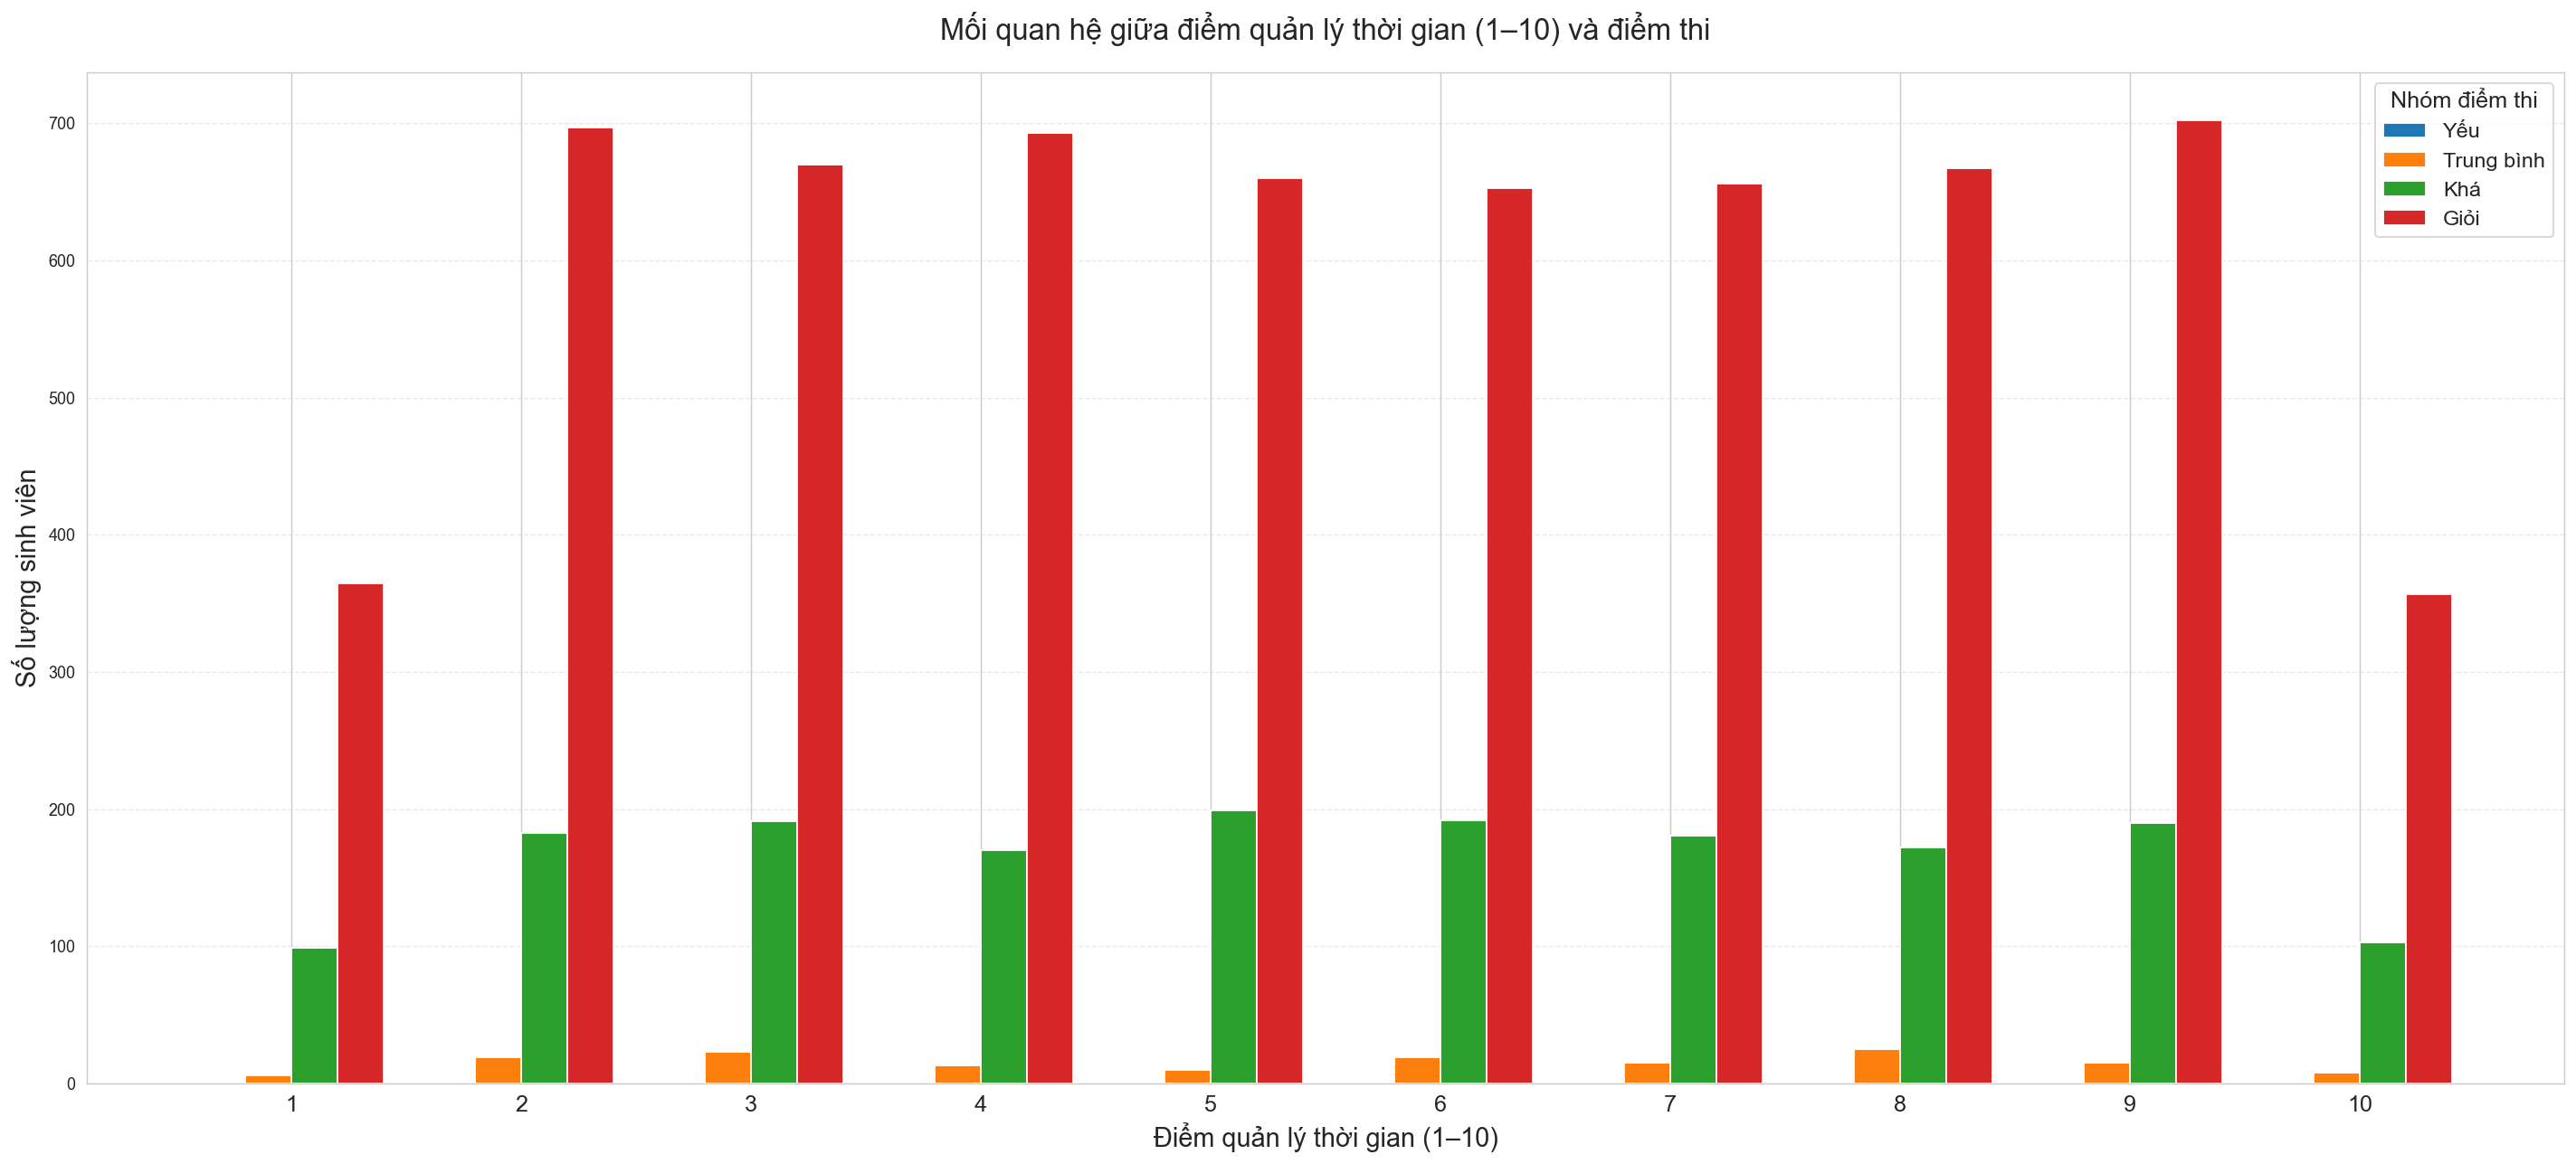

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_tm = df[df["time_management_score"].between(1, 10)]

bins_exam = [0, 40, 60, 80, 100]
labels_exam = ["Yếu", "Trung bình", "Khá", "Giỏi"]

df_tm["exam_score_group"] = pd.cut(
    df_tm["exam_score"],
    bins=bins_exam,
    labels=labels_exam,
    include_lowest=True
)

count_data = pd.crosstab(
    df_tm["time_management_score"],
    df_tm["exam_score_group"]
).astype(int)

count_data = count_data.reindex(range(1, 11), fill_value=0)

fig, ax = plt.subplots(figsize=(22, 10), dpi=130)

x = np.arange(len(count_data.index))   # 1..10
n_cols = len(count_data.columns)
bar_width = 0.8 / n_cols

for i, col in enumerate(count_data.columns):
    ax.bar(
        x + i * bar_width,
        count_data[col].values,
        width=bar_width,
        label=col
    )

ax.set_xticks(x + bar_width * (n_cols - 1) / 2)
ax.set_xticklabels(count_data.index, fontsize=14)

ax.set_xlabel("Điểm quản lý thời gian (1–10)", fontsize=16)
ax.set_ylabel("Số lượng sinh viên", fontsize=16)
ax.set_title(
    "Mối quan hệ giữa điểm quản lý thời gian (1–10) và điểm thi",
    fontsize=18,
    pad=20
)

ax.legend(
    title="Nhóm điểm thi",
    title_fontsize=14,
    fontsize=13
)

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


TRỰC QUAN HÓA MỐI QUAN HỆ GIỮA MỨC ĐỘ GIÚP ĐỠ CỦA CHA MẸ VỚI ĐIỂM THI

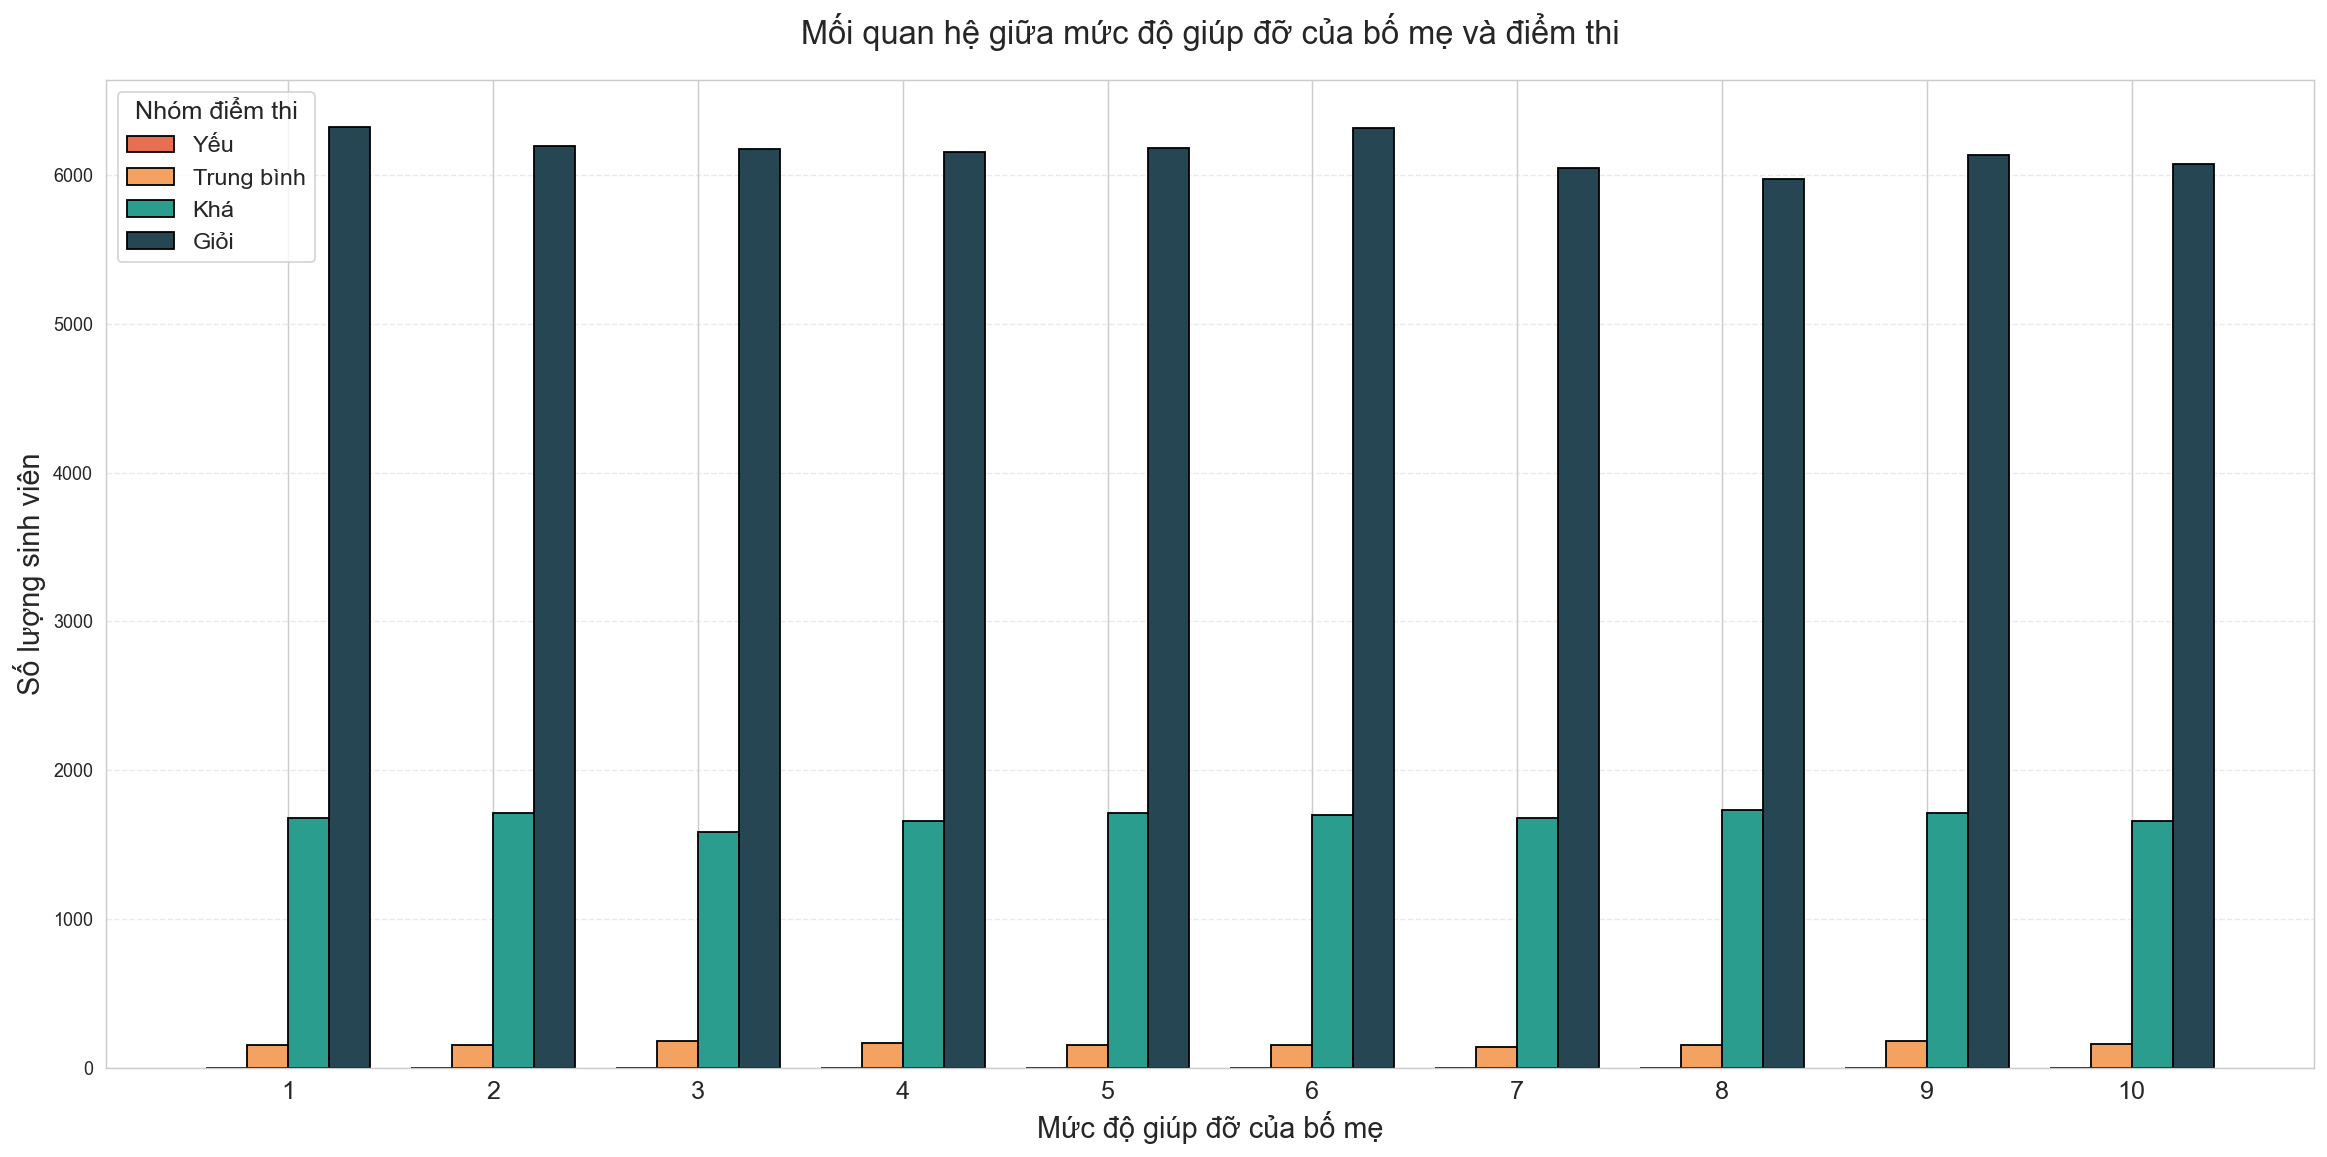

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chia điểm thi theo thang 100
bins_exam = [0, 40, 60, 80, 100]
labels_exam = ["Yếu", "Trung bình", "Khá", "Giỏi"]

df["exam_score_group"] = pd.cut(
    df["exam_score"],
    bins=bins_exam,
    labels=labels_exam,
    include_lowest=True
)

# Lọc dữ liệu hợp lệ
df_ps = df[df["parental_support_level"].notna()]

# Bảng đếm
count_data = pd.crosstab(
    df_ps["parental_support_level"],
    df_ps["exam_score_group"]
).astype(int)

# ===== MÀU CHO TỪNG NHÓM ĐIỂM =====
color_map = {
    "Trung bình": "#F4A261",  # cam nhạt
    "Khá": "#2A9D8F",         # xanh ngọc
    "Giỏi": "#264653",        # xanh đậm
    "Yếu": "#E76F51"          # đỏ nhạt (nếu có)
}

# ===== VẼ BIỂU ĐỒ CỘT =====
fig, ax = plt.subplots(figsize=(18, 9), dpi=130)

x = np.arange(len(count_data.index))
n_cols = len(count_data.columns)
bar_width = 0.8 / n_cols

for i, col in enumerate(count_data.columns):
    ax.bar(
        x + i * bar_width,
        count_data[col].values,
        width=bar_width,
        label=col,
        color=color_map.get(col, "#999999"),  # fallback màu xám
        edgecolor="black"
    )

ax.set_xticks(x + bar_width * (n_cols - 1) / 2)
ax.set_xticklabels(count_data.index, fontsize=14)

ax.set_xlabel("Mức độ giúp đỡ của bố mẹ", fontsize=16)
ax.set_ylabel("Số lượng sinh viên", fontsize=16)
ax.set_title(
    "Mối quan hệ giữa mức độ giúp đỡ của bố mẹ và điểm thi",
    fontsize=18,
    pad=20
)

ax.legend(
    title="Nhóm điểm thi",
    title_fontsize=14,
    fontsize=13
)

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


In [101]:
df_vietnamese.columns

Index(['Giờ học mỗi ngày', 'Giờ sử dụng mạng xã hội', 'Làm thêm',
       'Tỷ lệ điểm danh (%)', 'Giờ ngủ', 'Chất lượng chế độ ăn',
       'Tần suất tập thể dục', 'Đánh giá sức khỏe tinh thần',
       'GPA học kỳ trước', 'Mức độ căng thẳng', 'Nguy cơ bỏ học',
       'Thời gian dùng màn hình', 'Môi trường học tập',
       'Tiếp cận lớp phụ đạo / gia sư', 'Mức độ hỗ trợ của cha mẹ',
       'Mức độ động lực', 'Mức độ lo âu khi thi', 'Phong cách học tập',
       'Điểm quản lý thời gian', 'Điểm thi'],
      dtype='object')

TRỰC QUAN HÓA GIỮA TỈ LỆ ĐIỂM DANH VÀ ĐIỂM THI

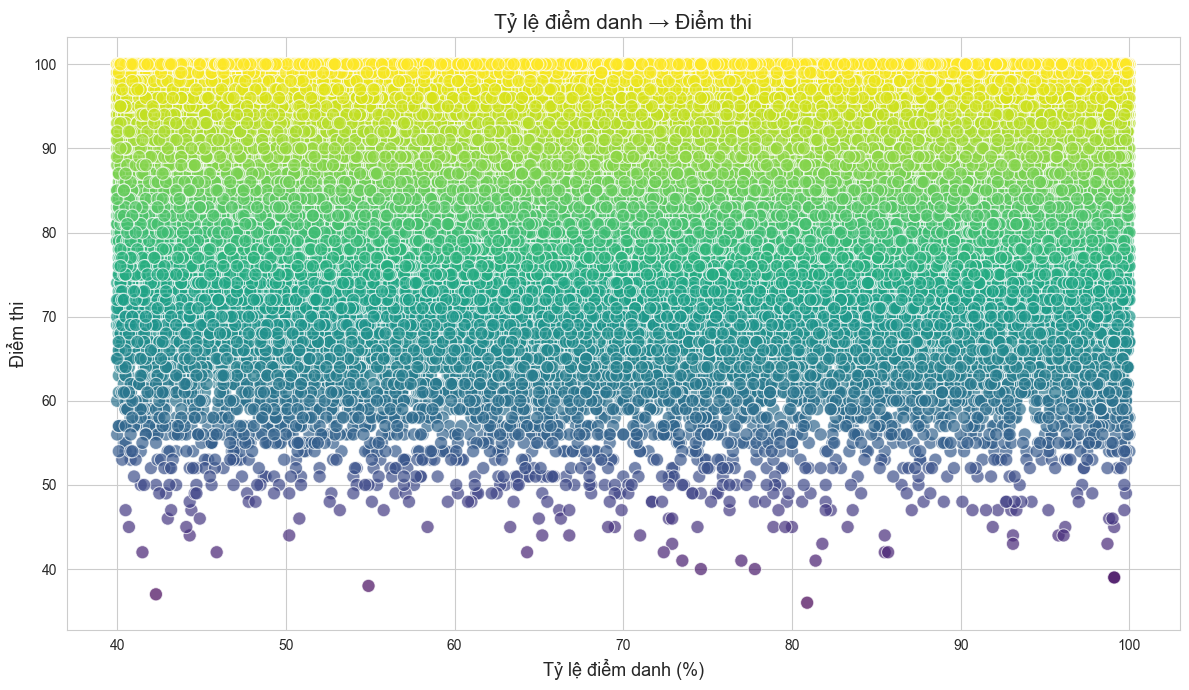

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df,
    x="attendance_percentage",
    y="exam_score",
    hue="exam_score",     # tô màu theo điểm thi
    palette="viridis",    # bảng màu đẹp, mượt
    alpha=0.7,
    s=90,
    legend=False          # tắt legend cho gọn
)

plt.title("Tỷ lệ điểm danh → Điểm thi", fontsize=15)
plt.xlabel("Tỷ lệ điểm danh (%)", fontsize=13)
plt.ylabel("Điểm thi", fontsize=13)

plt.tight_layout()
plt.show()


In [103]:
import pandas as pd

bins_exam = [0, 40, 60, 80, 100]
labels_exam = ["Yếu", "Trung bình", "Khá", "Giỏi"]

df["exam_score_group"] = pd.cut(
    df["exam_score"],
    bins=bins_exam,
    labels=labels_exam,
    include_lowest=True
)

bins_att = [0, 60, 70, 80, 90, 100]
labels_att = ["<60%", "60–70%", "70–80%", "80–90%", "90–100%"]

df["attendance_group"] = pd.cut(
    df["attendance_percentage"],
    bins=bins_att,
    labels=labels_att,
    include_lowest=True
)

def percent_table(group_df):
    counts = (
        group_df["exam_score_group"]
        .value_counts()
        .reindex(["Trung bình", "Khá", "Giỏi"], fill_value=0)
    )
    if counts.sum() == 0:
        return pd.Series([0, 0, 0], index=counts.index)
    return (counts / counts.sum() * 100).round(2)

result = pd.DataFrame()

for label in labels_att:
    group_df = df[df["attendance_group"] == label]
    result[label] = percent_table(group_df)

result = result.T
result.index.name = "Tỷ lệ điểm danh"

result


exam_score_group  Trung bình    Khá   Giỏi
Tỷ lệ điểm danh                           
<60%                    2.08  21.24  76.68
60–70%                  2.18  20.73  77.09
70–80%                  1.99  20.91  77.10
80–90%                  1.65  20.97  77.38
90–100%                 2.09  21.15  76.76

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
X = df_vietnamese.drop(columns=["Điểm thi"])
y = df_vietnamese["Điểm thi"]


In [106]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [108]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [109]:
X_train_processed = preprocess.fit_transform(X_train)
X_test_processed  = preprocess.transform(X_test)


In [110]:
import scipy.sparse

if scipy.sparse.issparse(X_train_processed):
    X_train_processed = X_train_processed.toarray()
    X_test_processed  = X_test_processed.toarray()


In [111]:

num_features = list(numeric_cols)
cat_features = preprocess.named_transformers_["cat"] \
    .get_feature_names_out(categorical_cols)

all_features = num_features + list(cat_features)

df_train_encoded = pd.DataFrame(
    X_train_processed,
    columns=all_features,
    index=X_train.index
)

df_train_encoded.head()


Giờ học mỗi ngày  Giờ sử dụng mạng xã hội  Tỷ lệ điểm danh (%)  \
3822           0.761391                -0.138526            -1.422701   
35562          1.160877                 1.523188            -1.318886   
4883           0.212097                -0.692430             1.270722   
71170          1.360620                -1.177097            -0.580646   
25665          0.062290                 1.384711             0.947742   

        Giờ ngủ  Tần suất tập thể dục  Đánh giá sức khỏe tinh thần  \
3822  -0.624377             -1.098401                    -0.418519   
35562  1.279993             -0.662084                     1.513862   
4883   0.055755             -1.534719                     0.103746   
71170 -0.692391             -1.534719                    -1.045237   
25665  0.055755             -1.098401                    -0.209613   

       GPA học kỳ trước  Mức độ căng thẳng  Thời gian dùng màn hình  \
3822           0.857995           1.477904                 0.838358   
35562          0.857995           0.145969                 1.234454   
4883           0.857995          -0.622455                -0.854052   
71170         -0.373875           1.170535                 0.082175   
25665         -1.584132          -0.468770                 0.046166   

       Mức độ hỗ trợ của cha mẹ  ...  Môi trường học tập_Co-Learning Group  \
3822                  -0.512533  ...                                   0.0   
35562                  0.880191  ...                                   0.0   
4883                   1.228372  ...                                   0.0   
71170                  0.183829  ...                                   1.0   
25665                 -0.860714  ...                                   0.0   

       Môi trường học tập_Dorm  Môi trường học tập_Library  \
3822                       0.0                         0.0   
35562                      1.0                         0.0   
4883                       0.0                         0.0   
71170                      0.0                         0.0   
25665                      0.0                         1.0   

       Môi trường học tập_Quiet Room  Tiếp cận lớp phụ đạo / gia sư_No  \
3822                             1.0                               0.0   
35562                            0.0                               0.0   
4883                             1.0                               0.0   
71170                            0.0                               1.0   
25665                            0.0                               1.0   

       Tiếp cận lớp phụ đạo / gia sư_Yes  Phong cách học tập_Auditory  \
3822                                 1.0                          0.0   
35562                                1.0                          0.0   
4883                                 1.0                          0.0   
71170                                0.0                          0.0   
25665                                0.0                          1.0   

       Phong cách học tập_Kinesthetic  Phong cách học tập_Reading  \
3822                              0.0                         1.0   
35562                             1.0                         0.0   
4883                              0.0                         0.0   
71170                             1.0                         0.0   
25665                             0.0                         0.0   

       Phong cách học tập_Visual  
3822                         0.0  
35562                        0.0  
4883                         1.0  
71170                        0.0  
25665                        0.0  

[5 rows x 31 columns]

RANDOM FOREST REGRESSOR

In [112]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,          
    min_samples_split=10,  
    min_samples_leaf=5,    
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_processed, y_train)

y_pred_rf = rf_model.predict(X_test_processed)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== RANDOM FOREST REGRESSION ===")
print("MAE :", mae_rf)
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R2  :", r2_rf)


=== RANDOM FOREST REGRESSION ===
MAE : 3.239435233451519
MSE : 17.487895829548048
RMSE: 4.1818531573392255
R2  : 0.8708316485346658


XGB REGRESSOR

In [113]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_processed, y_train)

y_pred_xgb = xgb_model.predict(X_test_processed)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("=== XGBoost Regression ===")
print("MAE :", mae_xgb)
print("MSE :", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2  :", r2_xgb)


=== XGBoost Regression ===
MAE : 3.24058198928833
MSE : 17.500734329223633
RMSE: 4.183387900879338
R2  : 0.870736837387085


DECISION TREE

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train_processed, y_train)

y_pred_dt = dt_model.predict(X_test_processed)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("=== DECISION TREE REGRESSION ===")
print("MAE :", mae_dt)
print("MSE :", mse_dt)
print("RMSE:", rmse_dt)
print("R2  :", r2_dt)


=== DECISION TREE REGRESSION ===
MAE : 3.442072084958475
MSE : 20.34397229625639
RMSE: 4.5104292807067035
R2  : 0.8497362181604566


GRADIENT BOOSTING

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    subsample=0.8,        
    min_samples_leaf=5
)

gbr_model.fit(X_train_processed, y_train)

y_pred_gbr = gbr_model.predict(X_test_processed)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("=== GRADIENT BOOSTING REGRESSION ===")
print("MAE :", mae_gbr)
print("MSE :", mse_gbr)
print("RMSE:", rmse_gbr)
print("R2  :", r2_gbr)


=== GRADIENT BOOSTING REGRESSION ===
MAE : 3.2239551090962184
MSE : 17.319843066818894
RMSE: 4.161711554975776
R2  : 0.8720729126943163


LINEAR REGRESSION

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()

lin_reg.fit(X_train_processed, y_train)

y_pred_lr = lin_reg.predict(X_test_processed)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== LINEAR REGRESSION ===")
print("MAE :", mae_lr)
print("MSE :", mse_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


=== LINEAR REGRESSION ===
MAE : 3.1963517382350384
MSE : 17.53946028778897
RMSE: 4.188013883428393
R2  : 0.8704507853290462


KNN

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train_processed, y_train)

y_pred_knn = knn_model.predict(X_test_processed)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("=== KNN REGRESSION ===")
print("MAE :", mae_knn)
print("MSE :", mse_knn)
print("RMSE:", rmse_knn)
print("R2  :", r2_knn)


=== KNN REGRESSION ===
MAE : 4.3145125
MSE : 30.731027500000003
RMSE: 5.543557296538028
R2  : 0.7730157933406767


MÔ HÌNH SO SÁNH TRỰC QUAN HÓA ĐỘ CHÍNH XÁC

In [118]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "KNN Regression",
        "Decision Tree Regression",
        "Random Forest Regression",
        "Gradient Boosting Regression",
        "XGBoost Regression"
    ],
    "MAE": [
        mae_lr,
        mae_knn,
        mae_dt,
        mae_rf,
        mae_gbr,
        mae_xgb
    ],
    "MSE": [
        mse_lr,
        mse_knn,
        mse_dt,
        mse_rf,
        mse_gbr,
        mse_xgb
    ],
    "RMSE": [
        rmse_lr,
        rmse_knn,
        rmse_dt,
        rmse_rf,
        rmse_gbr,
        rmse_xgb
    ],
    "R2": [
        r2_lr,
        r2_knn,
        r2_dt,
        r2_rf,
        r2_gbr,
        r2_xgb
    ]
})

results


Model       MAE        MSE      RMSE        R2
0             Linear Regression  3.196352  17.539460  4.188014  0.870451
1                KNN Regression  4.314513  30.731028  5.543557  0.773016
2      Decision Tree Regression  3.442072  20.343972  4.510429  0.849736
3      Random Forest Regression  3.239435  17.487896  4.181853  0.870832
4  Gradient Boosting Regression  3.223955  17.319843  4.161712  0.872073
5            XGBoost Regression  3.240582  17.500734  4.183388  0.870737

SO SÁNH R2 CỦA TẤT CẢ CÁC THUẬT TOÁN

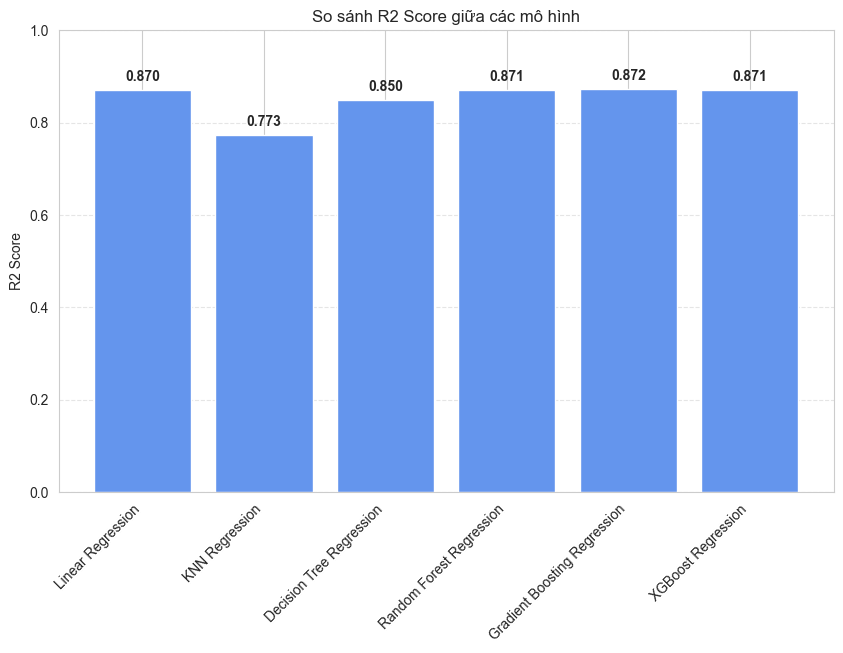

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

color = "cornflowerblue"

plt.bar(results["Model"], results["R2"], color=color)

plt.title("So sánh R2 Score giữa các mô hình")
plt.ylabel("R2 Score")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

for i, v in enumerate(results["R2"]):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


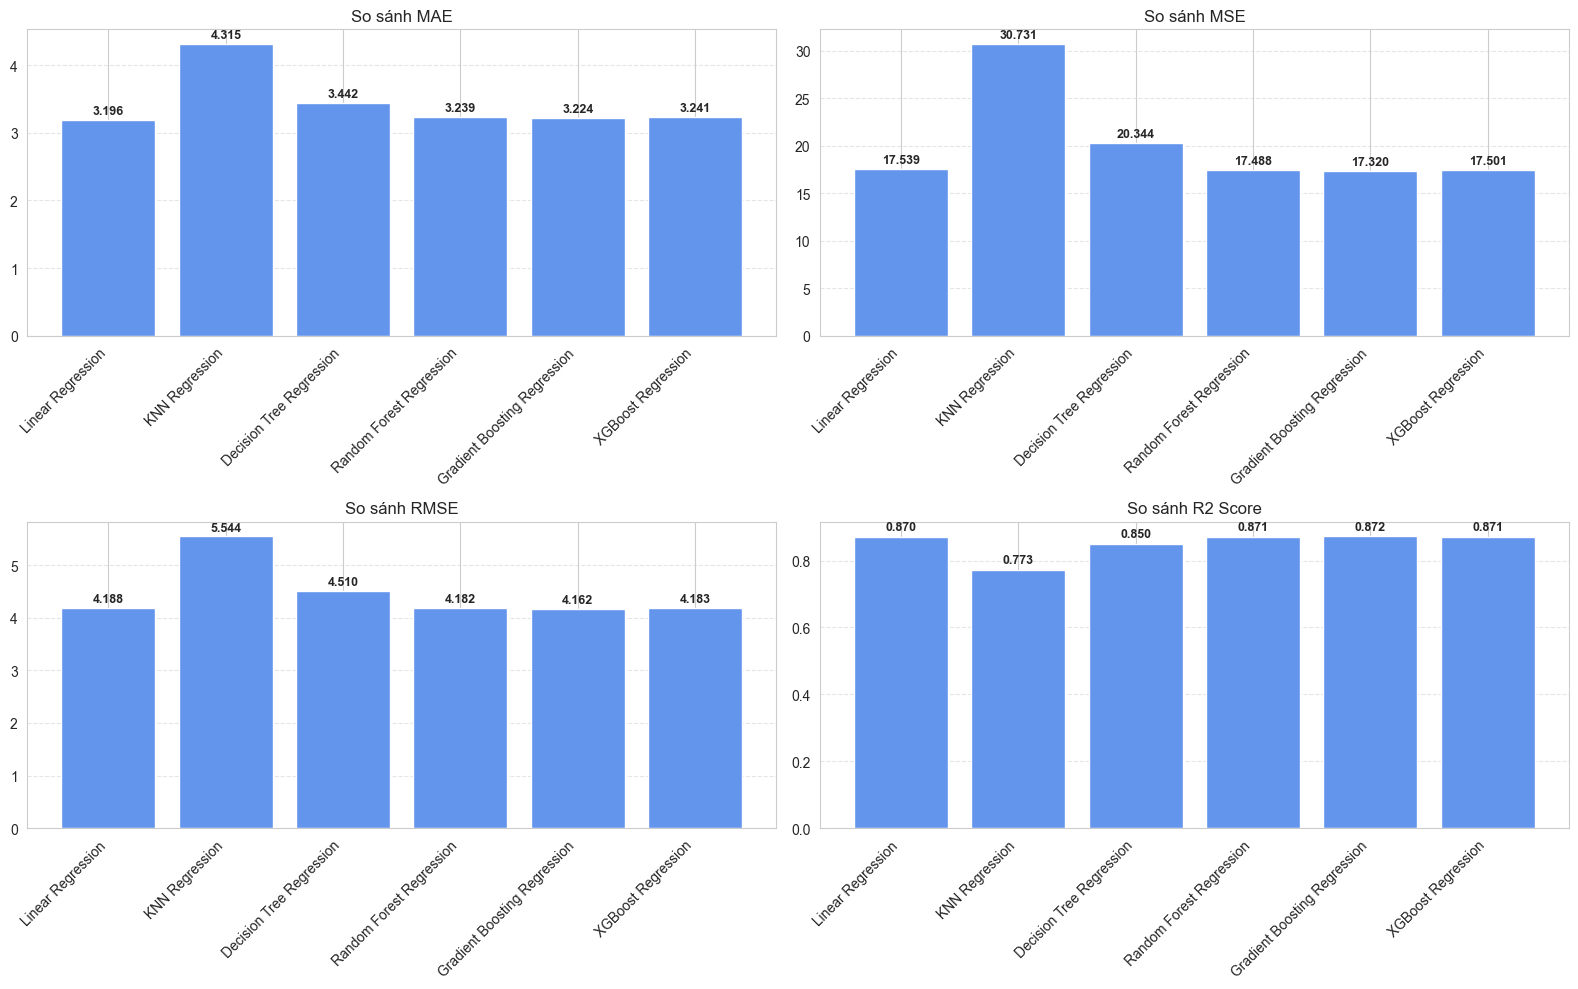

In [120]:
import matplotlib.pyplot as plt

color = "cornflowerblue"  
plt.figure(figsize=(16,10))


plt.subplot(2, 2, 1)
plt.bar(results["Model"], results["MAE"], color=color)
plt.title("So sánh MAE")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(results["MAE"]):
    plt.text(i, v + (0.02 * max(results["MAE"])), f"{v:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

plt.subplot(2, 2, 2)
plt.bar(results["Model"], results["MSE"], color=color)
plt.title("So sánh MSE")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(results["MSE"]):
    plt.text(i, v + (0.02 * max(results["MSE"])), f"{v:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

plt.subplot(2, 2, 3)
plt.bar(results["Model"], results["RMSE"], color=color)
plt.title("So sánh RMSE")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(results["RMSE"]):
    plt.text(i, v + (0.02 * max(results["RMSE"])), f"{v:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

plt.subplot(2, 2, 4)
plt.bar(results["Model"], results["R2"], color=color)
plt.title("So sánh R2 Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(results["R2"]):
    plt.text(i, v + 0.02, f"{v:.3f}", 
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


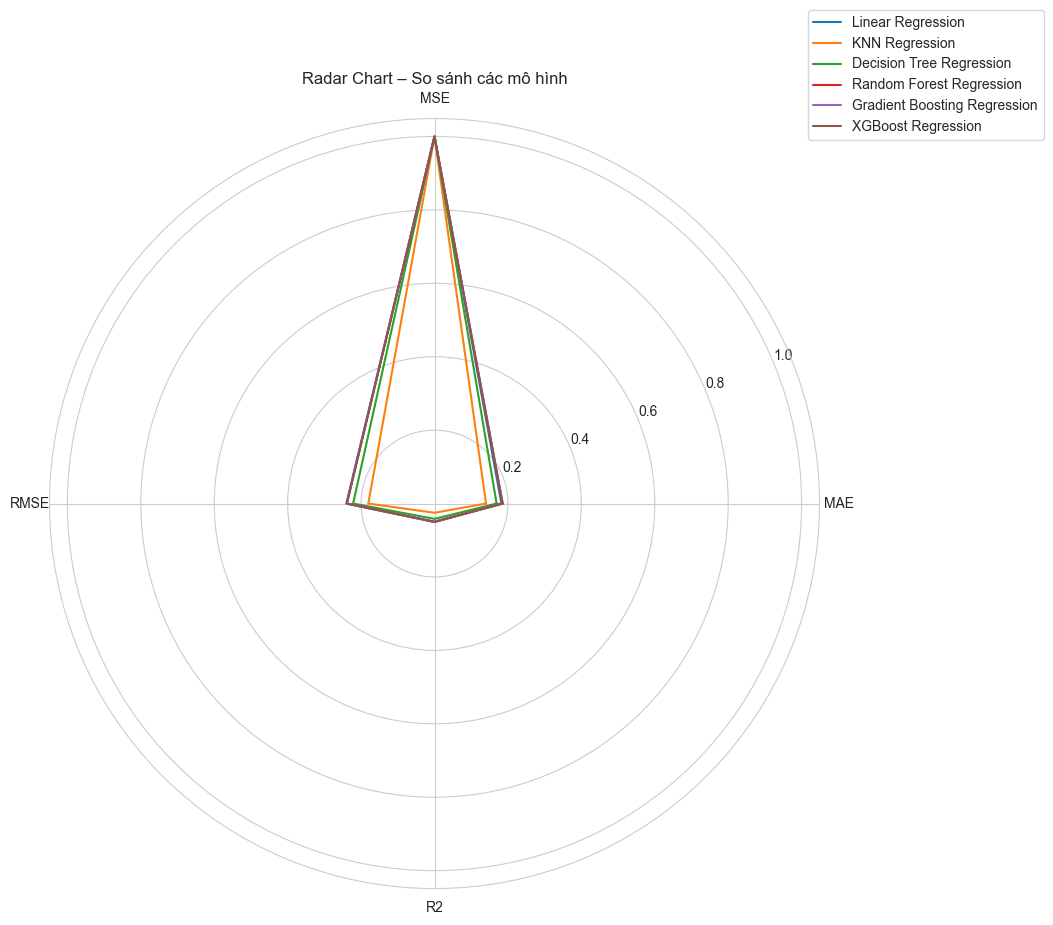

In [121]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["MAE", "MSE", "RMSE", "R2"]

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(10,10))

for i in range(len(results)):
    values = results.iloc[i, 1:].values

    norm = values / np.max(values)
    norm = np.concatenate((norm, [norm[0]]))

    plt.polar(angles, norm, label=results["Model"][i])

plt.xticks(angles[:-1], metrics)
plt.title("Radar Chart – So sánh các mô hình")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.15))
plt.show()


In [122]:
import joblib

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"✔ Mô hình đã được lưu vào: {filename}")

save_model(gbr_model, "gradient_boosting_model.pkl")
save_model(dt_model, "decision_tree_model.pkl")
save_model(rf_model, "random_forest_model.pkl")
save_model(xgb_model, "xgboost_model.pkl")
save_model(lin_reg, "linear_regression_model.pkl")


✔ Mô hình đã được lưu vào: gradient_boosting_model.pkl
✔ Mô hình đã được lưu vào: decision_tree_model.pkl
✔ Mô hình đã được lưu vào: random_forest_model.pkl
✔ Mô hình đã được lưu vào: xgboost_model.pkl
✔ Mô hình đã được lưu vào: linear_regression_model.pkl


In [123]:
df_vietnamese.columns

Index(['Giờ học mỗi ngày', 'Giờ sử dụng mạng xã hội', 'Làm thêm',
       'Tỷ lệ điểm danh (%)', 'Giờ ngủ', 'Chất lượng chế độ ăn',
       'Tần suất tập thể dục', 'Đánh giá sức khỏe tinh thần',
       'GPA học kỳ trước', 'Mức độ căng thẳng', 'Nguy cơ bỏ học',
       'Thời gian dùng màn hình', 'Môi trường học tập',
       'Tiếp cận lớp phụ đạo / gia sư', 'Mức độ hỗ trợ của cha mẹ',
       'Mức độ động lực', 'Mức độ lo âu khi thi', 'Phong cách học tập',
       'Điểm quản lý thời gian', 'Điểm thi'],
      dtype='object')

In [124]:
import joblib

joblib.dump(preprocess, "preprocess.pkl")
print("✔ Đã lưu preprocess.pkl")


✔ Đã lưu preprocess.pkl


In [125]:
X_train.columns

Index(['Giờ học mỗi ngày', 'Giờ sử dụng mạng xã hội', 'Làm thêm',
       'Tỷ lệ điểm danh (%)', 'Giờ ngủ', 'Chất lượng chế độ ăn',
       'Tần suất tập thể dục', 'Đánh giá sức khỏe tinh thần',
       'GPA học kỳ trước', 'Mức độ căng thẳng', 'Nguy cơ bỏ học',
       'Thời gian dùng màn hình', 'Môi trường học tập',
       'Tiếp cận lớp phụ đạo / gia sư', 'Mức độ hỗ trợ của cha mẹ',
       'Mức độ động lực', 'Mức độ lo âu khi thi', 'Phong cách học tập',
       'Điểm quản lý thời gian'],
      dtype='object')